<a href="https://colab.research.google.com/github/Pineappledeydre/indian_patients/blob/main/india_liver_patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# basic
import pandas as pd
import numpy as np

# working with dates
import datetime
import time


# visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, to_rgb, LinearSegmentedColormap
import matplotlib.font_manager as fm
from matplotlib.patches import Patch

import seaborn as sns
import missingno as msno
from IPython.display import Image
from sklearn.tree import plot_tree
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Pre-processing
from scipy.stats import skew, kurtosis, shapiro
from sklearn.preprocessing import RobustScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#Train and Test split
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold



#Different classification algorithms
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#Model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier

#Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,\
classification_report, roc_auc_score, recall_score

In [97]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [98]:
color1 = "#df594c"
color2 = "#1f786a"
color3 = "#254664"
color4 = "#a64d79"
text_color = "#0e1a40"
background_color = "#FFF2CC"
font = 'sans-serif'

custom_palette = [color1, color4, color2, color3]
cmap = LinearSegmentedColormap.from_list("", custom_palette, N=100)


# **Dataset Information**

## **Indian Liver Patient Records Dataset**

The **Indian Liver Patient Records** dataset is a medical dataset available on [Kaggle](https://www.kaggle.com/datasets/uciml/indian-liver-patient-records/data).

### **Overview**
- **Total records**: 583 patient entries  
  - **Patients with liver disease**: 416  
  - **Patients without liver disease**: 167

### **Features**
The dataset includes the following 11 columns:

1. **Age** – Age of the patient  
2. **Gender** – Gender of the patient  
3. **Total Bilirubin** – Measurement of bilirubin in the blood, indicating liver function  
4. **Direct Bilirubin** – Direct measurement of bilirubin in the blood  
5. **Alkaline Phosphatase** – Enzyme level indicating liver and bone health  
6. **Alamine Aminotransferase (ALT)** – Enzyme linked to liver function  
7. **Aspartate Aminotransferase (AST)** – Another liver-related enzyme  
8. **Total Proteins** – Total protein content in the blood  
9. **Albumin** – A protein made by the liver, indicating liver health and function  
10. **Albumin and Globulin Ratio** – A ratio used to assess liver function  
11. **Dataset** – A categorical label indicating whether the patient has liver disease (`liver disease` or `no disease`)

### **License**
This dataset is in the public domain (CC0 license), allowing unrestricted use and redistribution.

# **Loading and Viewing the Data**

In [99]:
import os
import shutil
import kagglehub
organizations_uciml_indian_liver_patient_records_path = kagglehub.dataset_download('uciml/indian-liver-patient-records')
print('Data source import complete.')

Data source import complete.


In [100]:
print(organizations_uciml_indian_liver_patient_records_path + '/indian_liver_patient.csv')

/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv


In [101]:
dataset_path = organizations_uciml_indian_liver_patient_records_path + '/indian_liver_patient.csv'
df = pd.read_csv(dataset_path)
df.columns = df.columns.map(str.lower)

df.head(10)

age  gender  total_bilirubin  direct_bilirubin  alkaline_phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   
5   46    Male              1.8               0.7                   208   
6   26  Female              0.9               0.2                   154   
7   29  Female              0.9               0.3                   202   
8   17    Male              0.9               0.3                   202   
9   55    Male              0.7               0.2                   290   

   alamine_aminotransferase  aspartate_aminotransferase  total_protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   
5                        19                          14             7.6   
6                        16                          12             7.0   
7                        14                          11             6.7   
8                        22                          19             7.4   
9                        53                          58             6.8   

   albumin  albumin_and_globulin_ratio  dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1  
5      4.4                        1.30        1  
6      3.5                        1.00        1  
7      3.6                        1.10        1  
8      4.1                        1.20        2  
9      3.4                        1.00        1

### If the data is loaded from a CSV file instead of directly from Kaggle

In [102]:
# df = pd.read_csv('indian_liver_patient.csv')
# df.columns = df.columns.map(str.lower)
# df.head()

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   alkaline_phosphotase        583 non-null    int64  
 5   alamine_aminotransferase    583 non-null    int64  
 6   aspartate_aminotransferase  583 non-null    int64  
 7   total_protiens              583 non-null    float64
 8   albumin                     583 non-null    float64
 9   albumin_and_globulin_ratio  579 non-null    float64
 10  dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [104]:
df.describe()[1:].T

mean         std   min    25%     50%  \
age                          44.746141   16.189833   4.0   33.0   45.00   
total_bilirubin               3.298799    6.209522   0.4    0.8    1.00   
direct_bilirubin              1.486106    2.808498   0.1    0.2    0.30   
alkaline_phosphotase        290.576329  242.937989  63.0  175.5  208.00   
alamine_aminotransferase     80.713551  182.620356  10.0   23.0   35.00   
aspartate_aminotransferase  109.910806  288.918529  10.0   25.0   42.00   
total_protiens                6.483190    1.085451   2.7    5.8    6.60   
albumin                       3.141852    0.795519   0.9    2.6    3.10   
albumin_and_globulin_ratio    0.947064    0.319592   0.3    0.7    0.93   
dataset                       1.286449    0.452490   1.0    1.0    1.00   

                              75%     max  
age                          58.0    90.0  
total_bilirubin               2.6    75.0  
direct_bilirubin              1.3    19.7  
alkaline_phosphotase        298.0  2110.0  
alamine_aminotransferase     60.5  2000.0  
aspartate_aminotransferase   87.0  4929.0  
total_protiens                7.2     9.6  
albumin                       3.8     5.5  
albumin_and_globulin_ratio    1.1     2.8  
dataset                       2.0     2.0

## **Normal Reference Ranges (Approximate) for Further Comparison**

- **Total Bilirubin**: 0.1 – 1.2 mg/dL  
- **Direct Bilirubin**: 0 – 0.3 mg/dL (typical observed mean: 1.49 ± 2.81 mg/dL)  
- **Alkaline Phosphatase**: 44 – 147 IU/L  
- **Alamine Aminotransferase (ALT)**: 7 – 56 IU/L  
- **Aspartate Aminotransferase (AST)**: 10 – 40 IU/L  
- **Total Proteins**: 6.0 – 8.3 g/dL  
- **Albumin**: 3.5 – 5.0 g/dL  
- **Albumin and Globulin Ratio**: 1.0 – 2.5  
- **Dataset (Liver Disease Indicator)**: Categorical (1 = Disease, 2 = No Disease)

In [105]:
normal_values = {
    'total_bilirubin': (0.1, 1.2),                  # Total Bilirubin (mg/dL)
    'direct_bilirubin': (0.0, 0.3),                 # Direct Bilirubin (mg/dL)
    'ALP': (44, 147),                               # Alkaline Phosphatase (IU/L)
    'ALT': (7, 56),                                 # Alamine Aminotransferase (IU/L)
    'AST': (10, 40),                                # Aspartate Aminotransferase (IU/L)
    'total_protiens': (6.0, 8.3),                   # Total Proteins (g/dL)
    'albumin': (3.5, 5.0),                          # Albumin (g/dL)
    'alb_glob_ratio': (1.0, 2.5),                   # Albumin and Globulin Ratio
    'disease_presence': (1, 2)                       # Disease Presence (1: Disease, 2: No Disease)
}

# **Data Preprocessing**

In the column indicating presence/absence of disease, we'll replace `2` with `0` (which represents absence of disease).

In [106]:
df.dataset.unique()

array([1, 2])

In [107]:
df['dataset'] = df['dataset'].replace(2, 0)
## --> 0 - no disease, 1 - disease

In [108]:
df = df.rename(columns={'dataset': 'disease_presence',
                        'albumin_and_globulin_ratio' : 'alb_glob_ratio'})

We'll replace gender with numeric values: `0` for Female and `1` for Male, instead of string values.

In [109]:
# change gender - 0-female, 1-male
df['gender']=df['gender'].apply(lambda x:1 if x=='Male' else 0)

In [110]:
df.describe()[1:].T

mean         std   min    25%     50%  \
age                          44.746141   16.189833   4.0   33.0   45.00   
gender                        0.756432    0.429603   0.0    1.0    1.00   
total_bilirubin               3.298799    6.209522   0.4    0.8    1.00   
direct_bilirubin              1.486106    2.808498   0.1    0.2    0.30   
alkaline_phosphotase        290.576329  242.937989  63.0  175.5  208.00   
alamine_aminotransferase     80.713551  182.620356  10.0   23.0   35.00   
aspartate_aminotransferase  109.910806  288.918529  10.0   25.0   42.00   
total_protiens                6.483190    1.085451   2.7    5.8    6.60   
albumin                       3.141852    0.795519   0.9    2.6    3.10   
alb_glob_ratio                0.947064    0.319592   0.3    0.7    0.93   
disease_presence              0.713551    0.452490   0.0    0.0    1.00   

                              75%     max  
age                          58.0    90.0  
gender                        1.0     1.0  
total_bilirubin               2.6    75.0  
direct_bilirubin              1.3    19.7  
alkaline_phosphotase        298.0  2110.0  
alamine_aminotransferase     60.5  2000.0  
aspartate_aminotransferase   87.0  4929.0  
total_protiens                7.2     9.6  
albumin                       3.8     5.5  
alb_glob_ratio                1.1     2.8  
disease_presence              1.0     1.0

In [111]:
# Healthy People
df[df.disease_presence == 0].describe()[1:].T

mean         std    min    25%    50%  \
age                          41.239521   16.999366   4.00   28.0   40.0   
gender                        0.700599    0.459373   0.00    0.0    1.0   
total_bilirubin               1.142515    1.004472   0.50    0.7    0.8   
direct_bilirubin              0.396407    0.519255   0.10    0.2    0.2   
alkaline_phosphotase        219.754491  140.986262  90.00  161.5  186.0   
alamine_aminotransferase     33.652695   25.060392  10.00   20.0   27.0   
aspartate_aminotransferase   40.688623   36.411620  10.00   21.0   29.0   
total_protiens                6.543114    1.063042   3.70    5.9    6.6   
albumin                       3.344311    0.783690   1.40    2.9    3.4   
alb_glob_ratio                1.029576    0.287252   0.37    0.9    1.0   
disease_presence              0.000000    0.000000   0.00    0.0    0.0   

                               75%     max  
age                          55.00    85.0  
gender                        1.00     1.0  
total_bilirubin               1.10     7.3  
direct_bilirubin              0.35     3.6  
alkaline_phosphotase        213.00  1580.0  
alamine_aminotransferase     37.50   181.0  
aspartate_aminotransferase   43.50   285.0  
total_protiens                7.30     9.2  
albumin                       4.00     5.0  
alb_glob_ratio                1.20     1.9  
disease_presence              0.00     0.0

In [112]:
# Sick People
df[df.disease_presence == 1].describe()[1:].T

mean         std   min     25%     50%  \
age                          46.153846   15.654412   7.0   34.00   46.00   
gender                        0.778846    0.415524   0.0    1.00    1.00   
total_bilirubin               4.164423    7.144831   0.4    0.80    1.40   
direct_bilirubin              1.923558    3.206901   0.1    0.20    0.50   
alkaline_phosphotase        319.007212  268.307911  63.0  186.00  229.00   
alamine_aminotransferase     99.605769  212.768472  12.0   25.00   41.00   
aspartate_aminotransferase  137.699519  337.389980  11.0   29.75   52.50   
total_protiens                6.459135    1.094659   2.7    5.70    6.55   
albumin                       3.060577    0.786595   0.9    2.50    3.00   
alb_glob_ratio                0.914179    0.326153   0.3    0.70    0.90   
disease_presence              1.000000    0.000000   1.0    1.00    1.00   

                                75%     max  
age                          58.000    90.0  
gender                        1.000     1.0  
total_bilirubin               3.625    75.0  
direct_bilirubin              1.800    19.7  
alkaline_phosphotase        315.250  2110.0  
alamine_aminotransferase     76.500  2000.0  
aspartate_aminotransferase  108.750  4929.0  
total_protiens                7.200     9.6  
albumin                       3.625     5.5  
alb_glob_ratio                1.100     2.8  
disease_presence              1.000     1.0

## **NaN – Missing / Null Values**

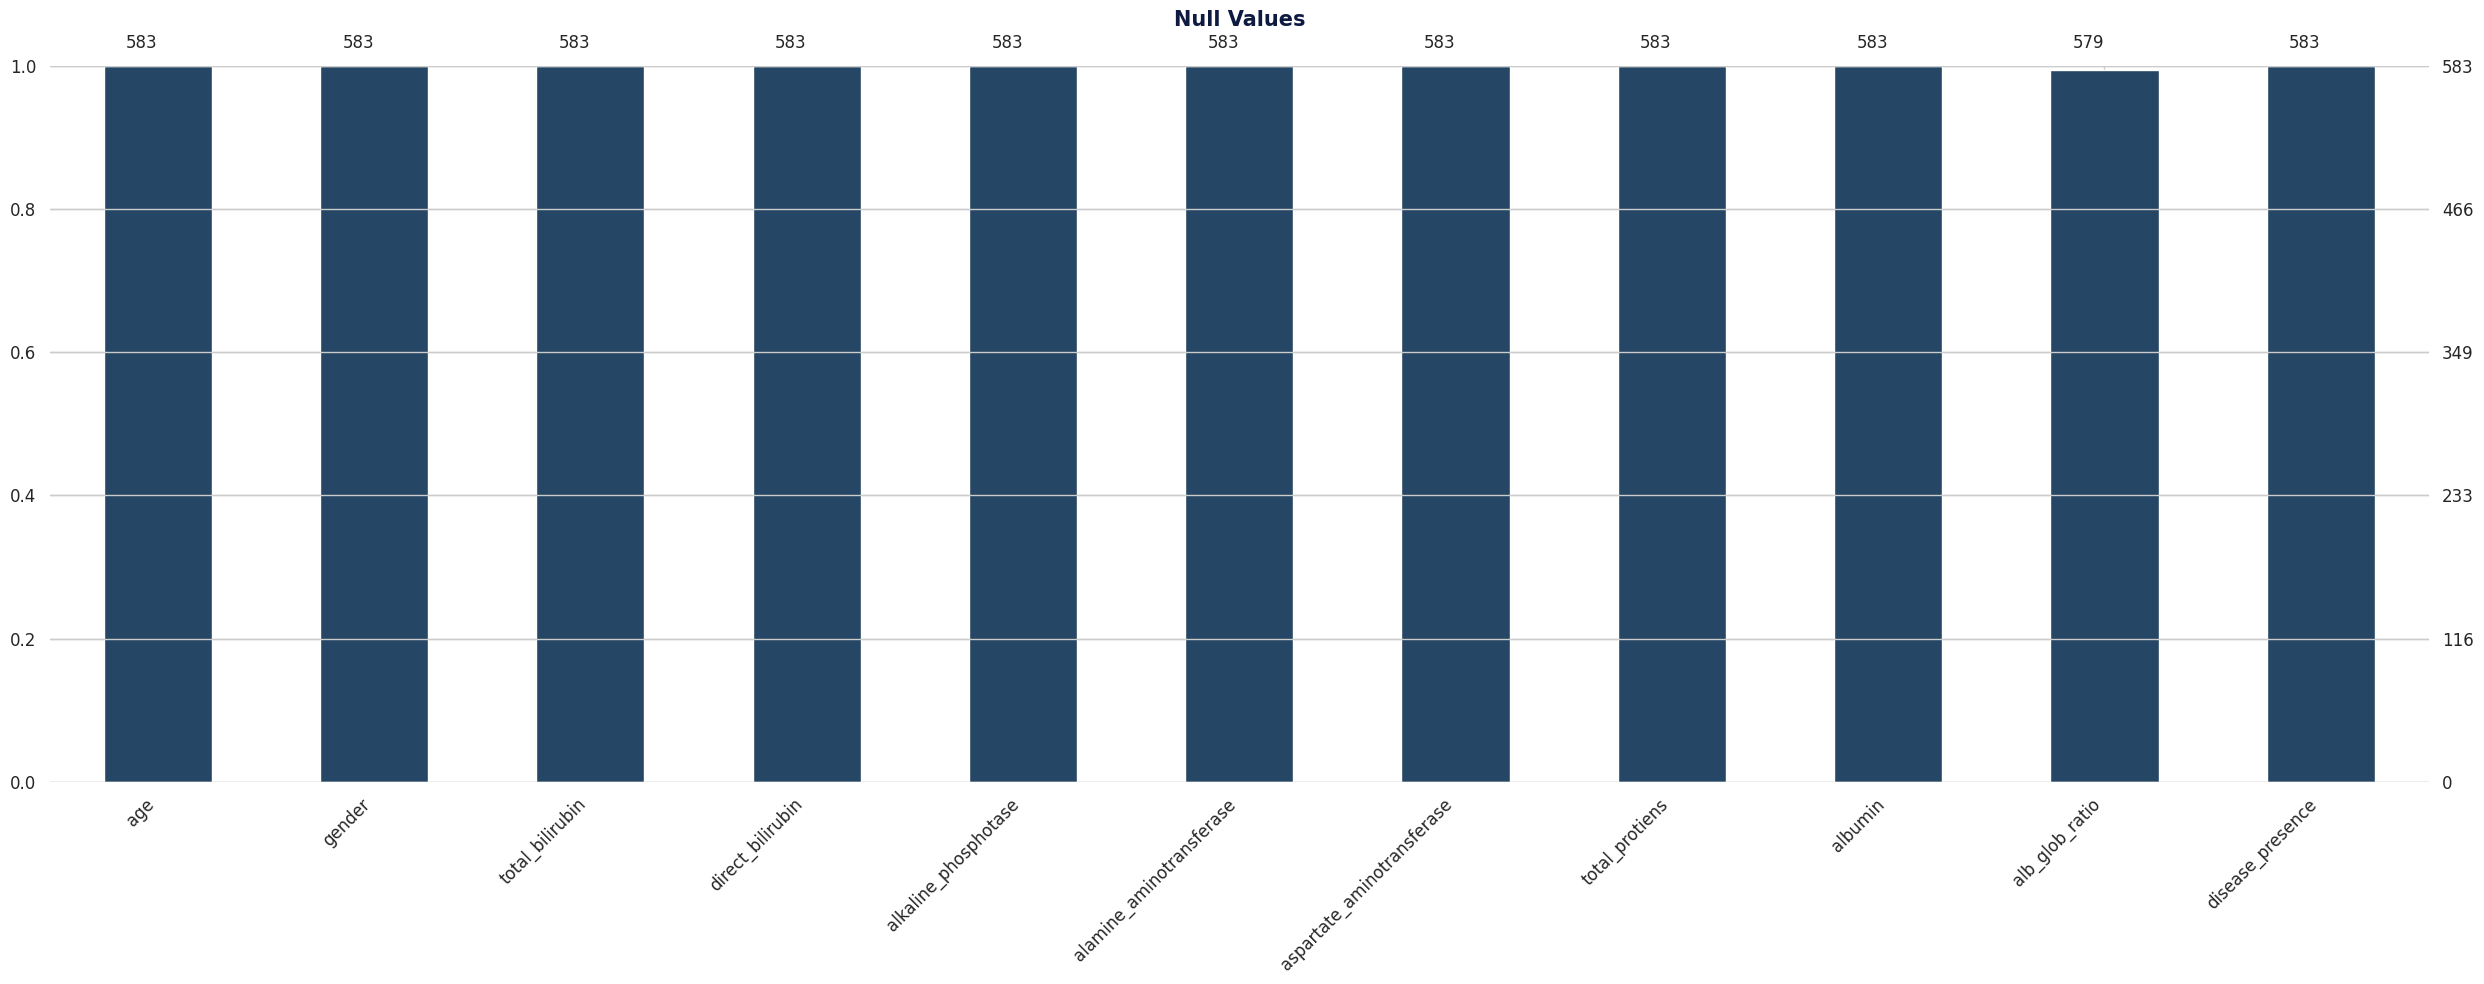

In [113]:
plt.figure(figsize=(5, 8))
msno.bar(df, labels=True, color=color3, fontsize=12)
plt.title('Null Values', fontsize=15, fontweight='bold', color = text_color)
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.1)
plt.tight_layout()
plt.show()

In [114]:
df.isnull().sum()

age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
alb_glob_ratio                4
disease_presence              0
dtype: int64

In [115]:
# Replace the 4 missing values with the mean
# Compute mean separately for healthy and sick patients
mean_alb_glob_ratio_healthy = df[df['disease_presence'] == 0]['alb_glob_ratio'].mean()
mean_alb_glob_ratio_sick = df[df['disease_presence'] == 1]['alb_glob_ratio'].mean()

df.loc[(df['alb_glob_ratio'].isnull()) & (df['disease_presence'] == 1), 'alb_glob_ratio'] = mean_alb_glob_ratio_sick
df.loc[(df['alb_glob_ratio'].isnull()) & (df['disease_presence'] == 0), 'alb_glob_ratio'] = mean_alb_glob_ratio_healthy

## **Check for Outliers**

In [116]:
df.columns

Index(['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'total_protiens', 'albumin',
       'alb_glob_ratio', 'disease_presence'],
      dtype='object')

In [117]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 6 * IQR
    upper_bound = Q3 + 6 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def analyze_outliers_by_group(df, column):
    df_sick = df[df['disease_presence'] == 1]
    df_healthy = df[df['disease_presence'] == 0]

    outliers_sick = find_outliers(df_sick, column)
    outliers_healthy = find_outliers(df_healthy, column)

    mean_sick = df_sick[column].mean()
    mean_healthy = df_healthy[column].mean()

    print(f"Outliers in column: {column}")

    if not outliers_sick.empty:
        print(f"\nOutliers for patients with liver disease:")
        for idx, row in outliers_sick.iterrows():
            deviation_percent = ((row[column] - mean_sick) / mean_sick) * 100
            print(
                f"  Value: {row[column]:.2f}, Deviation from mean: {deviation_percent:.2f}% (above normal)"
                if deviation_percent > 0
                else f"  Value: {row[column]:.2f}, Deviation from mean: {abs(deviation_percent):.2f}% (below normal)"
            )
    else:
        print("  No outliers found for patients with liver disease.")

    if not outliers_healthy.empty:
        print(f"\nOutliers for healthy patients:")
        for idx, row in outliers_healthy.iterrows():
            deviation_percent = ((row[column] - mean_healthy) / mean_healthy) * 100
            print(
                f"  Value: {row[column]:.2f}, Deviation from mean: {deviation_percent:.2f}% (above normal)"
                if deviation_percent > 0
                else f"  Value: {row[column]:.2f}, Deviation from mean: {abs(deviation_percent):.2f}% (below normal)"
            )
    else:
        print("  No outliers found for healthy patients.")

    print("\n" + "-"*50 + "\n")

numeric_columns = ['age', 'total_bilirubin', 'direct_bilirubin', 'alkaline_phosphotase',
                   'alamine_aminotransferase', 'aspartate_aminotransferase', 'total_protiens',
                   'albumin', 'alb_glob_ratio']

for col in numeric_columns:
    analyze_outliers_by_group(df, col)

Outliers in column: age
  No outliers found for patients with liver disease.
  No outliers found for healthy patients.

--------------------------------------------------

Outliers in column: total_bilirubin

Outliers for patients with liver disease:
  Value: 23.00, Deviation from mean: 452.30% (above normal)
  Value: 22.70, Deviation from mean: 445.09% (above normal)
  Value: 75.00, Deviation from mean: 1700.97% (above normal)
  Value: 22.80, Deviation from mean: 447.49% (above normal)
  Value: 27.20, Deviation from mean: 553.15% (above normal)
  Value: 30.50, Deviation from mean: 632.39% (above normal)
  Value: 23.20, Deviation from mean: 457.10% (above normal)
  Value: 22.60, Deviation from mean: 442.69% (above normal)
  Value: 23.30, Deviation from mean: 459.50% (above normal)
  Value: 30.50, Deviation from mean: 632.39% (above normal)
  Value: 32.60, Deviation from mean: 682.82% (above normal)
  Value: 26.30, Deviation from mean: 531.54% (above normal)
  Value: 30.80, Deviation fr

In [118]:
# Function to find outliers among healthy patients
def find_outliers_for_healthy(df, column):
    df_healthy = df[df['disease_presence'] == 0]

    Q1 = df_healthy[column].quantile(0.25)
    Q3 = df_healthy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 6 * IQR
    upper_bound = Q3 + 6 * IQR

    # Find outliers among healthy patients
    outliers_healthy = df_healthy[(df_healthy[column] < lower_bound) | (df_healthy[column] > upper_bound)]

    return outliers_healthy, lower_bound, upper_bound

# Function to calculate deviation from the mean for sick patients
def deviation_from_mean_for_sick(df, column, outliers_healthy):
    df_sick = df[df['disease_presence'] == 1]

    mean_sick = df_sick[column].mean()

    outliers_healthy['deviation_from_mean, %'] = (outliers_healthy[column] - mean_sick) / mean_sick * 100

    return outliers_healthy

numeric_columns = ['age', 'total_bilirubin', 'direct_bilirubin', 'alkaline_phosphotase',
                   'alamine_aminotransferase', 'aspartate_aminotransferase', 'total_protiens',
                   'albumin', 'alb_glob_ratio']

outliers_summary = {}

for col in numeric_columns:
    # Find outliers for healthy individuals
    outliers_healthy, lower_bound, upper_bound = find_outliers_for_healthy(df, col)

    # If outliers are found, compute their deviation from the sick group mean
    if not outliers_healthy.empty:
        outliers_healthy_with_deviation = deviation_from_mean_for_sick(df, col, outliers_healthy)
        outliers_summary[col] = outliers_healthy_with_deviation[['disease_presence', col, 'deviation_from_mean, %']]

for col, outliers_data in outliers_summary.items():
    print(f"\nOutliers in column: {col}")
    print(outliers_data)


Outliers in column: total_bilirubin
     disease_presence  total_bilirubin  deviation_from_mean, %
42                  0              6.8               63.287924
105                 0              5.3               27.268529
106                 0              5.3               27.268529
114                 0              5.8               39.274994
115                 0              7.3               75.294389

Outliers in column: direct_bilirubin
     disease_presence  direct_bilirubin  deviation_from_mean, %
42                  0               3.2               66.358410
105                 0               2.3               19.570107
106                 0               2.3               19.570107
114                 0               3.0               55.961010
115                 0               3.6               87.153212
327                 0               1.6              -16.820795
386                 0               1.4              -27.218195

Outliers in column: alkaline_phosp

**Analysis of Deviations from the Mean**  
- **Small deviations (less than 250%)** are not considered critical, as the values of healthy patients do not differ significantly from the average values for sick patients.  
- **Large deviations (greater than 250%)** may indicate significant anomalies in the data, and such values might need to be excluded or handled differently.

In [119]:
def replace_large_deviations_with_limit(df, column, outliers_healthy, deviation_limit=250):
    df_sick = df[df['disease_presence'] == 1]
    mean_sick = df_sick[column].mean()

    outliers_healthy['deviation_from_mean, %'] = (outliers_healthy[column] - mean_sick) / mean_sick * 100

    # Save original deviation values
    outliers_healthy['old_deviation_from_mean, %'] = outliers_healthy['deviation_from_mean, %'].copy()

    # Replace values with deviation > 250% with the mean of sick patients
    outliers_healthy.loc[outliers_healthy['deviation_from_mean, %'].abs() > deviation_limit, column] = mean_sick

    # Cap the deviation at ±250%
    outliers_healthy.loc[outliers_healthy['deviation_from_mean, %'].abs() > deviation_limit, 'deviation_from_mean, %'] = deviation_limit

    # Round for readability
    outliers_healthy['deviation_from_mean, %'] = outliers_healthy['deviation_from_mean, %'].round(2)
    outliers_healthy['old_deviation_from_mean, %'] = outliers_healthy['old_deviation_from_mean, %'].round(2)

    return outliers_healthy

for col in numeric_columns:
    outliers_healthy = find_outliers(df, col)
    if not outliers_healthy.empty:
        outliers_healthy = replace_large_deviations_with_limit(df, col, outliers_healthy, deviation_limit=250)
        print(f'Processed outliers for column: {col}')
        print(outliers_healthy[[col, 'old_deviation_from_mean, %', 'deviation_from_mean, %']].head())  # Show first 5 rows for verification

Processed outliers for column: total_bilirubin
     total_bilirubin  old_deviation_from_mean, %  deviation_from_mean, %
37         14.200000                      240.98                  240.98
49          4.164423                      341.84                  250.00
118         4.164423                      281.81                  250.00
119         4.164423                      332.23                  250.00
120         4.164423                      452.30                  250.00
Processed outliers for column: direct_bilirubin
     direct_bilirubin  old_deviation_from_mean, %  deviation_from_mean, %
49           1.923558                      357.49                   250.0
119          1.923558                      326.29                   250.0
120          1.923558                      487.45                   250.0
121          1.923558                      430.27                   250.0
168          1.923558                      555.04                   250.0
Processed outliers for 

In [120]:
df.describe()[1:].T

mean         std   min    25%     50%  \
age                          44.746141   16.189833   4.0   33.0   45.00   
gender                        0.756432    0.429603   0.0    1.0    1.00   
total_bilirubin               3.298799    6.209522   0.4    0.8    1.00   
direct_bilirubin              1.486106    2.808498   0.1    0.2    0.30   
alkaline_phosphotase        290.576329  242.937989  63.0  175.5  208.00   
alamine_aminotransferase     80.713551  182.620356  10.0   23.0   35.00   
aspartate_aminotransferase  109.910806  288.918529  10.0   25.0   42.00   
total_protiens                6.483190    1.085451   2.7    5.8    6.60   
albumin                       3.141852    0.795519   0.9    2.6    3.10   
alb_glob_ratio                0.947234    0.318534   0.3    0.7    0.93   
disease_presence              0.713551    0.452490   0.0    0.0    1.00   

                              75%     max  
age                          58.0    90.0  
gender                        1.0     1.0  
total_bilirubin               2.6    75.0  
direct_bilirubin              1.3    19.7  
alkaline_phosphotase        298.0  2110.0  
alamine_aminotransferase     60.5  2000.0  
aspartate_aminotransferase   87.0  4929.0  
total_protiens                7.2     9.6  
albumin                       3.8     5.5  
alb_glob_ratio                1.1     2.8  
disease_presence              1.0     1.0

# **Visualization**  

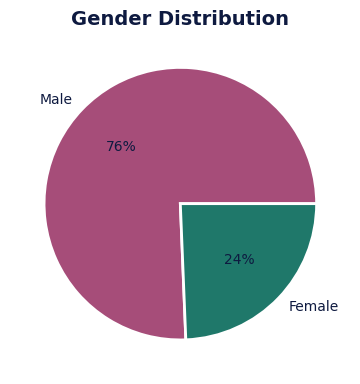

In [121]:
keys = ['Male', 'Female']
data = [sum([1 if i == 1 else 0 for i in df.gender]),
        sum([1 if i == 0 else 0 for i in df.gender])]

fig, ax = plt.subplots(figsize=(4, 4))
patches, texts, pcts = ax.pie(data, labels=keys, colors=[color4, color2],
                              autopct='%.0f%%',
                              wedgeprops={'linewidth': 2.0, 'edgecolor': '#fff'},
                              textprops={'size': 'smaller', 'color': text_color})

# Title and layout
plt.title("Gender Distribution", fontsize=14, color=text_color, fontweight='bold')
plt.tight_layout()
plt.show()


**The ratio of females to males is approximately 1 to 3.**

### KDE

In [122]:
# skewness and kurtosis
skewness = df.skew()
kurtosis_values = df.kurtosis()

#Shapiro-Wilk test and store p-values
normality_tests = {col: shapiro(df[col])[1] for col in df.columns}

results = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis_values,
    'Shapiro p-value': normality_tests
})

results

Skewness    Kurtosis  Shapiro p-value
age                         -0.029385   -0.560066     3.665164e-03
gender                      -1.197919   -0.566947     1.441510e-36
total_bilirubin              4.907474   37.163792     1.577378e-38
direct_bilirubin             3.212403   11.352529     1.156300e-36
alkaline_phosphotase         3.765106   17.752828     5.217318e-35
alamine_aminotransferase     6.549192   50.579450     1.402674e-41
aspartate_aminotransferase  10.546177  150.919884     1.484317e-42
total_protiens              -0.285672    0.233039     3.702222e-03
albumin                     -0.043685   -0.387905     6.234972e-03
alb_glob_ratio               0.993752    3.319628     1.064640e-13
disease_presence            -0.947140   -1.106735     1.399918e-35

In [123]:
def print_kde(column):
    plt.figure(figsize=(10, 4))
    #plt.style.use('seaborn-whitegrid')
    #plt.gca().set_facecolor(background_color)

    plt.xlabel(column.capitalize(), fontsize=14, color=text_color, labelpad=10, weight='semibold', fontname=font)
    plt.ylabel('Density', fontsize=14, color=text_color, labelpad=10, weight='semibold', fontname=font)

    sns.kdeplot(df[column], fill=True, color=color4, linewidth=1.5)

    plt.title(f"{column.capitalize()} - Density Plot", fontsize=16, color=text_color, fontweight="bold", pad=10)

    # Mean line
    mean_value = df[column].mean()
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(mean_value, color=color1, linestyle='dashed', linewidth=1.5)
    plt.text(mean_value * 1.2, max_ylim * 0.7,
             f'Mean: {mean_value:.1f} U/L', fontsize=12, color=text_color, weight='semibold')

    # Median line
    median_value = np.median(df[column])
    plt.axvline(median_value, color=color3, linestyle='dashed', linewidth=1.5)
    plt.text(median_value * 1.2, max_ylim * 0.8,
             f'Median: {median_value:.1f} U/L', fontsize=12, color=text_color, weight='semibold')

    # Normal value range
    if column in normal_values:
        normal_min, normal_max = normal_values[column]
        plt.text(0.95, 0.95,
                 f'Normal: {normal_min} - {normal_max} U/L',
                 fontsize=12, color=color2, weight='semibold',
                 ha='right', va='top', transform=plt.gca().transAxes)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [124]:
df.rename(columns={
    'alkaline_phosphotase': 'ALP',
    'alamine_aminotransferase': 'ALT',
    'aspartate_aminotransferase': 'AST',
}, inplace=True)


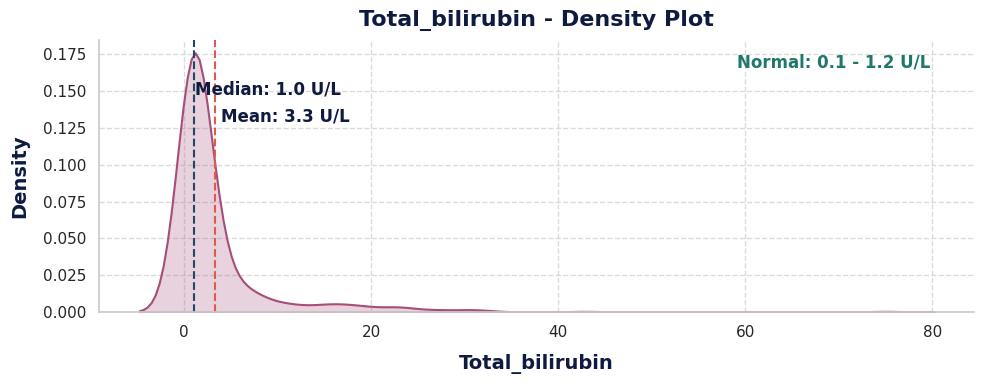

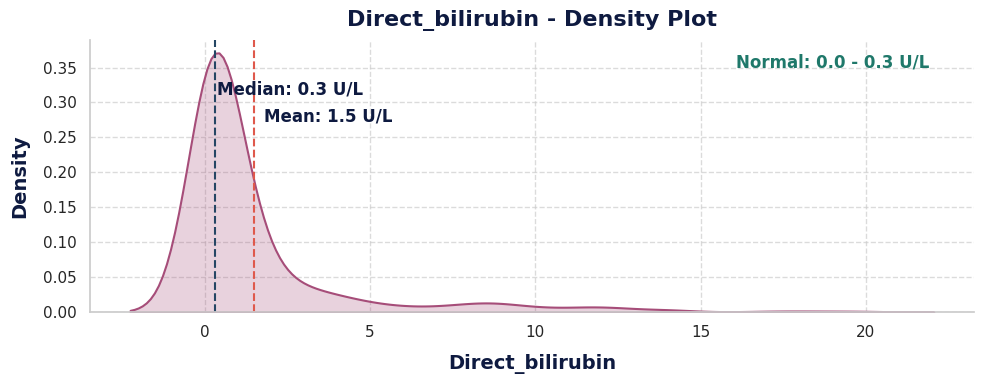

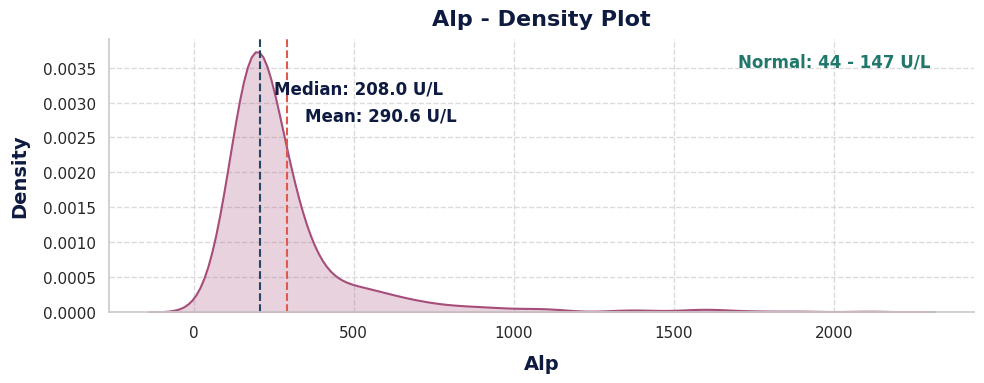

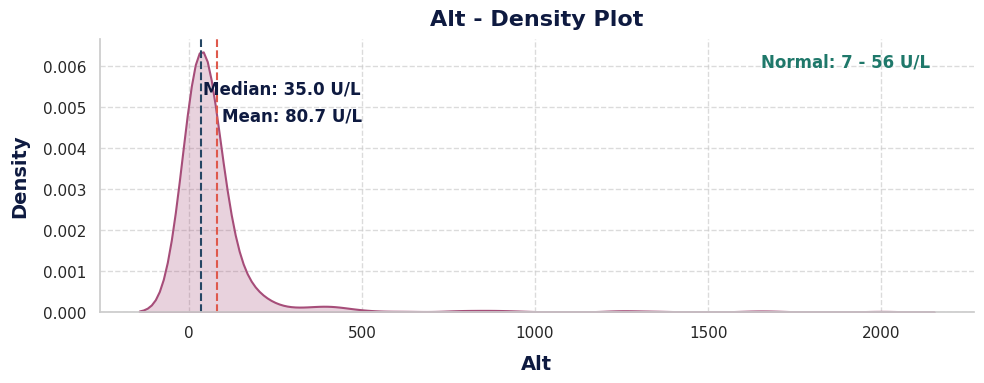

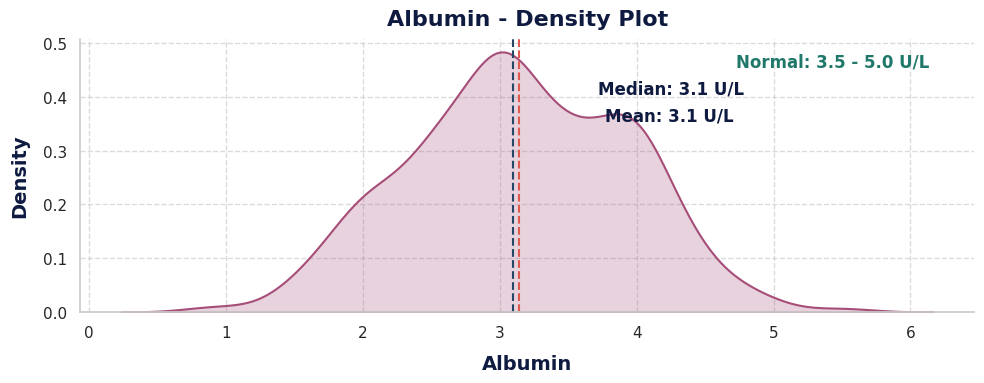

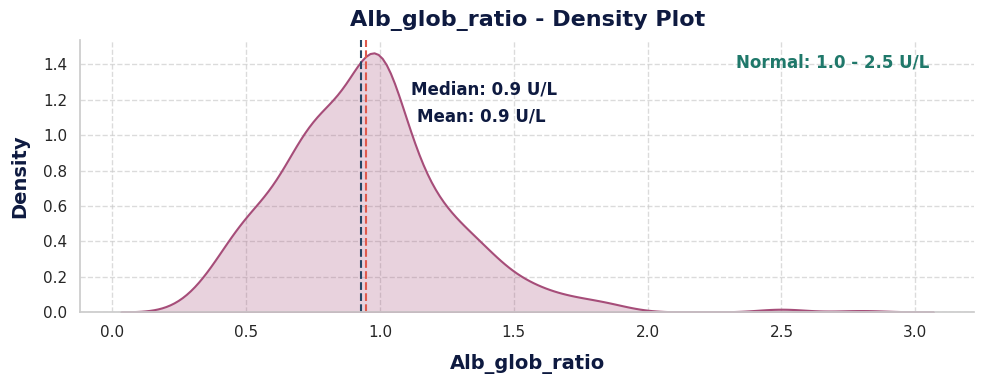

In [125]:
for i in [ 'total_bilirubin', 'direct_bilirubin', 'ALP', 'ALT',
       'AST', 'total_protiens', 'albumin', 'alb_glob_ratio',]:
    print_kde(i)

## **Comparison KDE**

In [126]:
def print_kde_compare(column):
    plt.figure(figsize=(10, 4))
    #plt.style.use('seaborn-whitegrid')
    #plt.gca().set_facecolor(background_color)

    plt.xlabel(column.capitalize(), fontsize=14, color=text_color, labelpad=10, weight='semibold', fontname=font)
    plt.ylabel('Density', fontsize=14, color=text_color, labelpad=10, weight='semibold', fontname=font)

    sns.kdeplot(df[df['disease_presence'] == 1][column], fill=False, color=color1, label='Liver Disease', linewidth=2)
    sns.kdeplot(df[df['disease_presence'] == 0][column], fill=False, color=color2, label='No Liver Disease', linewidth=2)

    plt.title(f"{column.capitalize()} - Density Plot Comparison", fontsize=16, color=text_color, fontweight="bold", pad=10)

    plt.legend(title='Condition', title_fontsize='13', fontsize='11', loc='lower right', frameon=True)

    if column in normal_values:
        normal_min, normal_max = normal_values[column]
        plt.text(0.95, 0.95,
                 f'Normal: {normal_min} - {normal_max} U/L',
                 fontsize=12, color=color3, weight='semibold',
                 ha='right', va='top', transform=plt.gca().transAxes)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

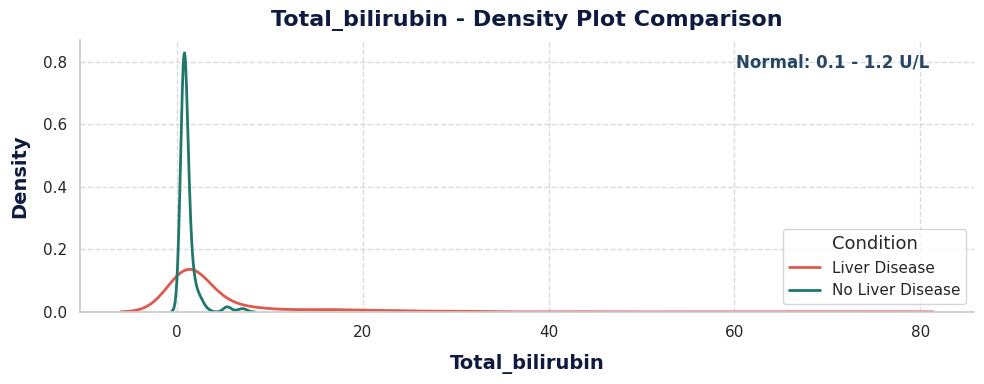

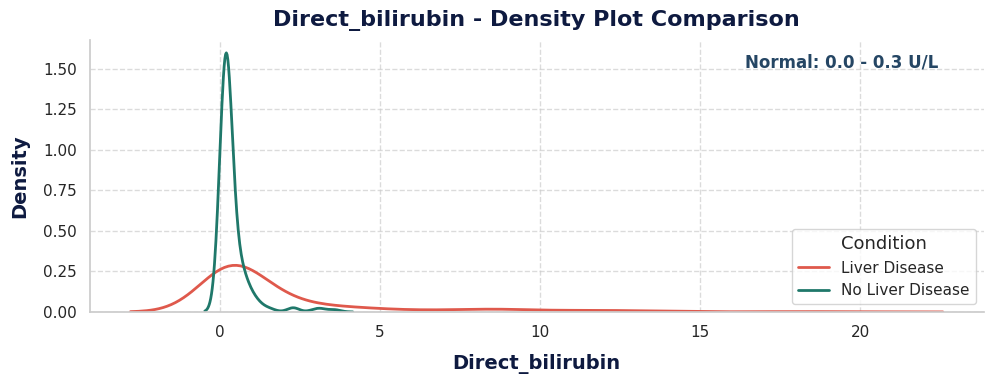

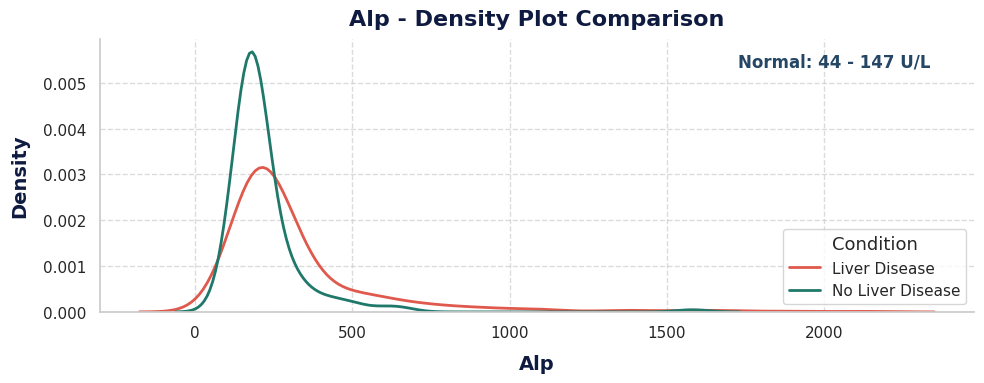

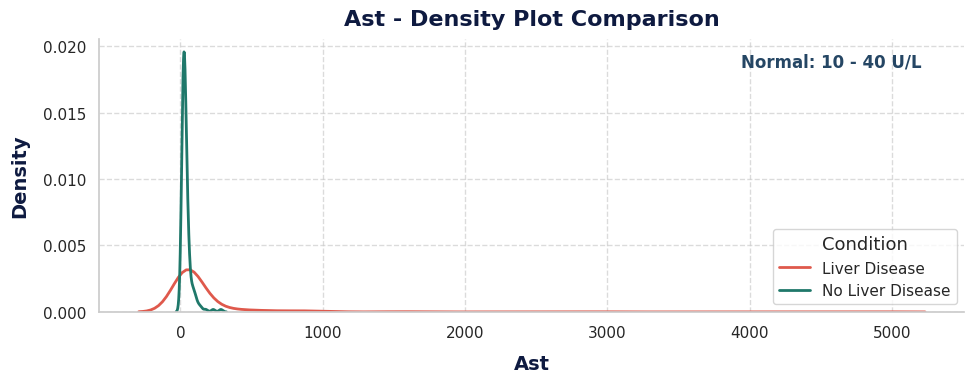

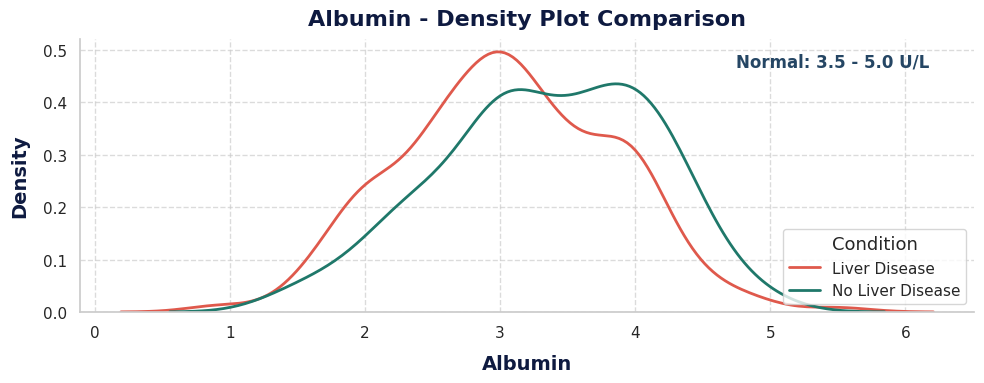

In [127]:
for i in [ 'total_bilirubin', 'direct_bilirubin', 'ALP', 'ALT',
       'AST', 'total_protiens', 'albumin', 'alb_glob_ratio',]:
    print_kde_compare(i)

#### **Highly Skewed and Non-Normal Variables:**
- **total_bilirubin** (Skewness: 4.91, Kurtosis: 37.16)  
- **direct_bilirubin** (Skewness: 3.21, Kurtosis: 11.35)  
- **ALP** (Skewness: 3.77, Kurtosis: 17.75)  
- **ALT** (Skewness: 6.55, Kurtosis: 50.58)  
- **AST** (Skewness: 10.55, Kurtosis: 150.92)  

It is highly recommended to apply a `log1p` transformation to these columns to reduce skewness and normalize the distributions.

#### **Moderately Skewed Variable:**
- **alb_glob_ratio** (Skewness: 0.99, Kurtosis: 3.32)

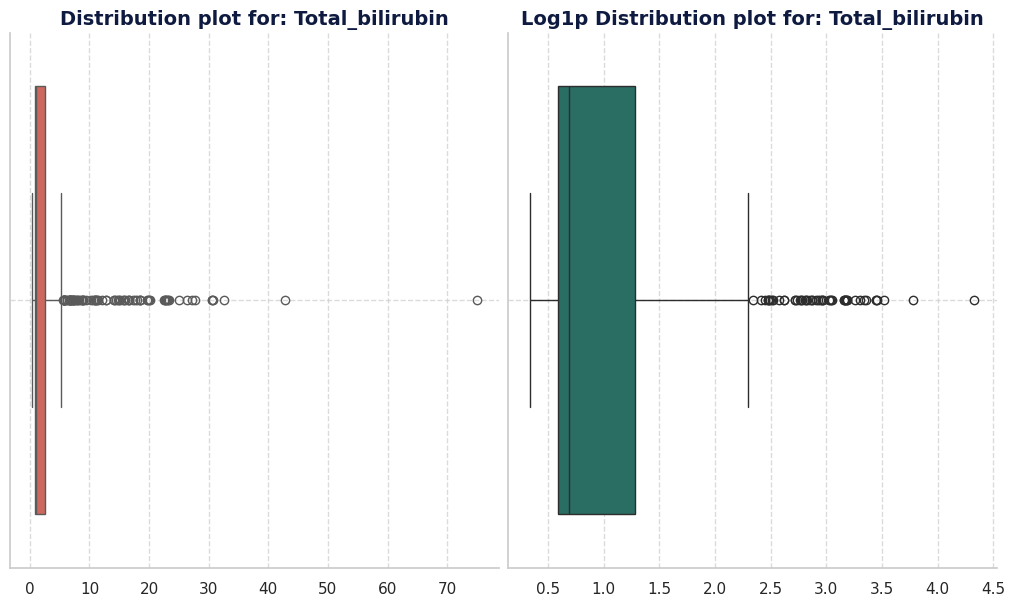

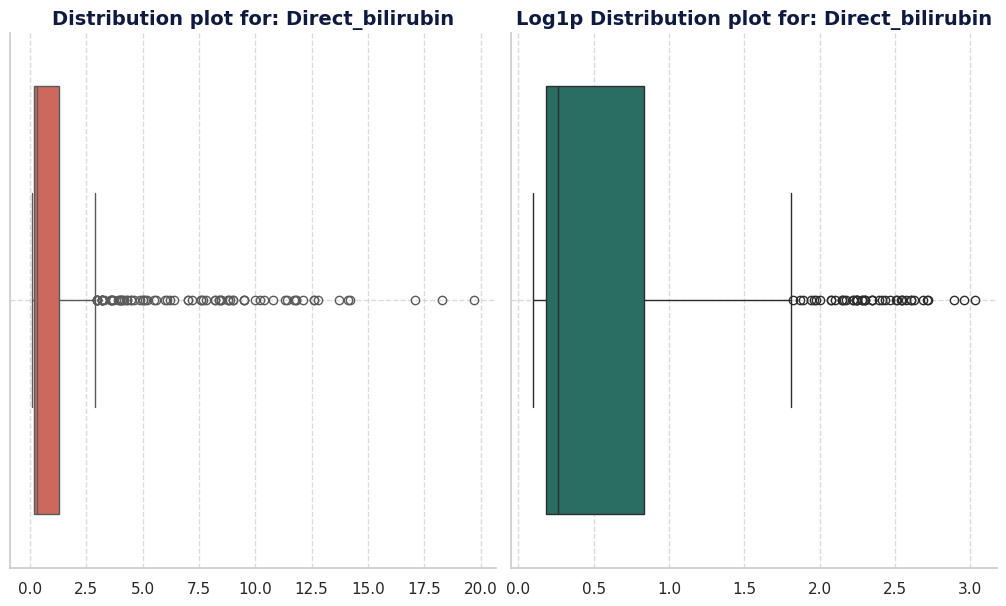

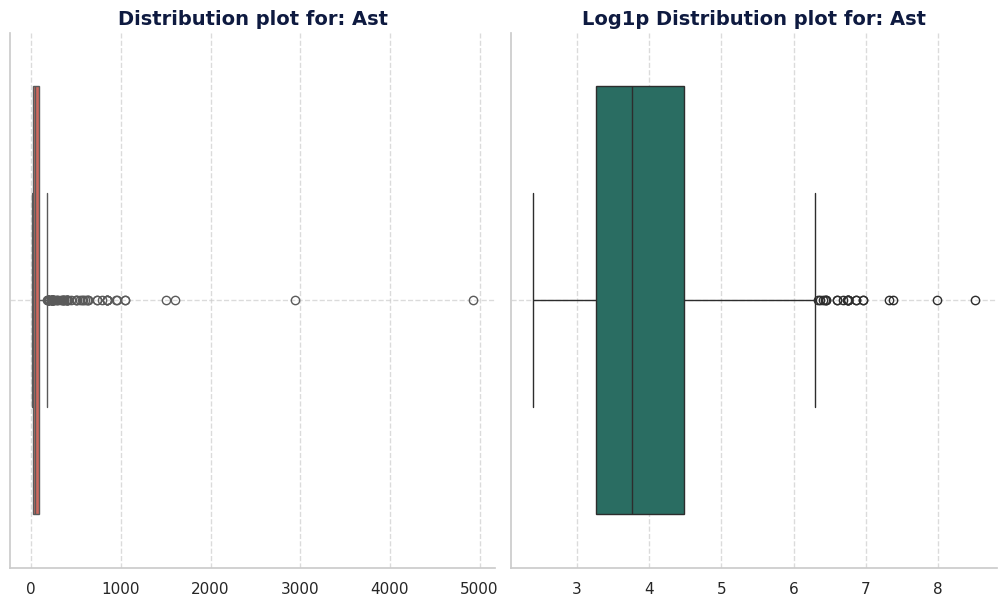

In [128]:
def print_boxplot_compare(column):
    plt.figure(figsize=(10, 6))
    #plt.style.use('seaborn-whitegrid')
    #plt.gca().set_facecolor(background_color)

    # before log1p
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column], color=color1)
    plt.title(f'Distribution plot for: {column.capitalize()}', fontsize=14, color=text_color, fontweight="semibold")
    plt.xlabel('')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(True, linestyle='--', alpha=0.7)

    # log1p-transformed distribution
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column].apply(np.log1p), color=color2)
    plt.title(f'Log1p Distribution plot for: {column.capitalize()}', fontsize=14, color=text_color, fontweight="semibold")
    plt.xlabel('')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()

for column in [ 'total_bilirubin', 'direct_bilirubin', 'ALP', 'ALT', 'AST', 'alb_glob_ratio']:
    print_boxplot_compare(column)

## **log1p + scaling**

In [129]:
for column in [ 'total_bilirubin', 'direct_bilirubin', 'ALP', 'ALT', 'AST', 'alb_glob_ratio']:
    df[column] = df[column].apply('log1p')

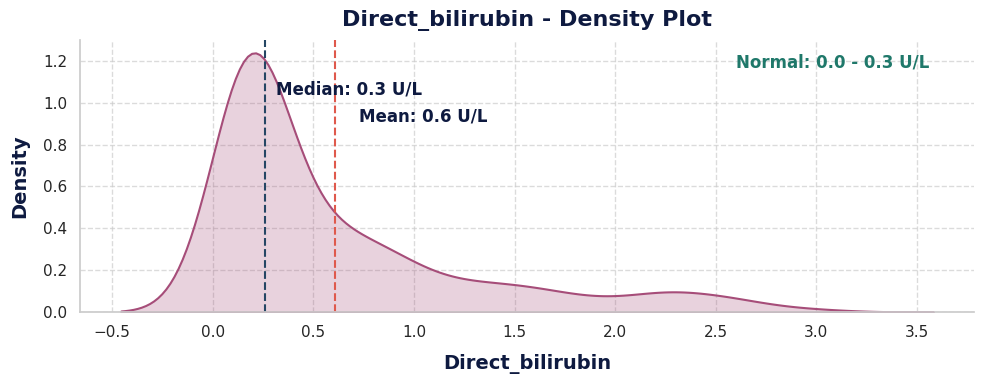

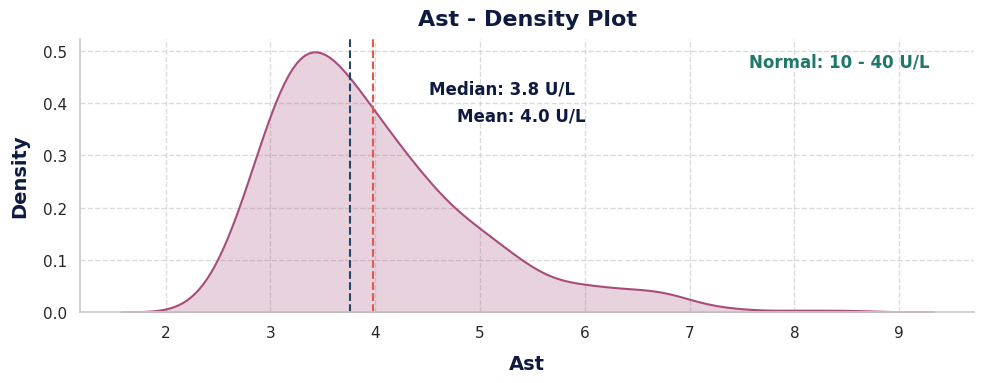

In [130]:
for i in [ 'total_bilirubin', 'direct_bilirubin', 'ALP', 'ALT', 'AST', 'alb_glob_ratio']:
    print_kde(i)

In [131]:
# skewness and kurtosis
skewness = df.skew()
kurtosis_values = df.kurtosis()

#Shapiro-Wilk test
normality_tests = {col: shapiro(df[col])[1] for col in df.columns}

results = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis_values,
    'Shapiro p-value': normality_tests
})

results

Skewness  Kurtosis  Shapiro p-value
age              -0.029385 -0.560066     3.665164e-03
gender           -1.197919 -0.566947     1.441510e-36
total_bilirubin   1.728075  2.338205     1.451855e-28
direct_bilirubin  1.688721  2.058743     4.169971e-29
ALP               1.331077  2.293423     2.447695e-19
ALT               1.473774  2.785473     5.840189e-20
AST               1.232742  1.705884     6.978125e-18
total_protiens   -0.285672  0.233039     3.702222e-03
albumin          -0.043685 -0.387905     6.234972e-03
alb_glob_ratio    0.231021  0.772277     7.258009e-07
disease_presence -0.947140 -1.106735     1.399918e-35

#### **Robust Scaler**

*I will save the unprocessed dataset so I can later apply transformations using a pipeline.*

The `RobustScaler` scales features by removing the median and scaling them according to the interquartile range (IQR):

**X_scaled =  [X − median(X)] / IQR(X)**

→ This method scales the data based on the median and IQR, making it less sensitive to extreme outliers compared to other scalers.

In [132]:
columns_to_scale = ['age', 'total_bilirubin', 'direct_bilirubin', 'ALP', 'ALT', 'AST', 'total_protiens', 'albumin', 'alb_glob_ratio']
df_scaled = df.copy()

rs = RobustScaler()
df_scaled[columns_to_scale] = rs.fit_transform(df_scaled[columns_to_scale])

In [133]:
df_scaled.head()

age  gender  total_bilirubin  direct_bilirubin       ALP       ALT  \
0  0.80       0        -0.234465         -0.256774 -0.200886 -0.797391   
1  0.68       1         2.572890          2.473822  2.293084  0.627949   
2  0.68       1         2.053111          2.100987  1.620312  0.560449   
3  0.52       1         0.000000          0.113909 -0.252023 -0.930409   
4  1.08       1         1.292782          1.285374 -0.121830 -0.267086   

        AST  total_protiens   albumin  alb_glob_ratio  disease_presence  
0 -0.669894        0.142857  0.166667       -0.074138                 1  
1  0.700371        0.642857  0.083333       -0.490442                 1  
2  0.387870        0.285714  0.166667       -0.099112                 1  
3 -0.587807        0.142857  0.250000        0.168602                 1  
4  0.273239        0.500000 -0.583333       -1.519328                 1

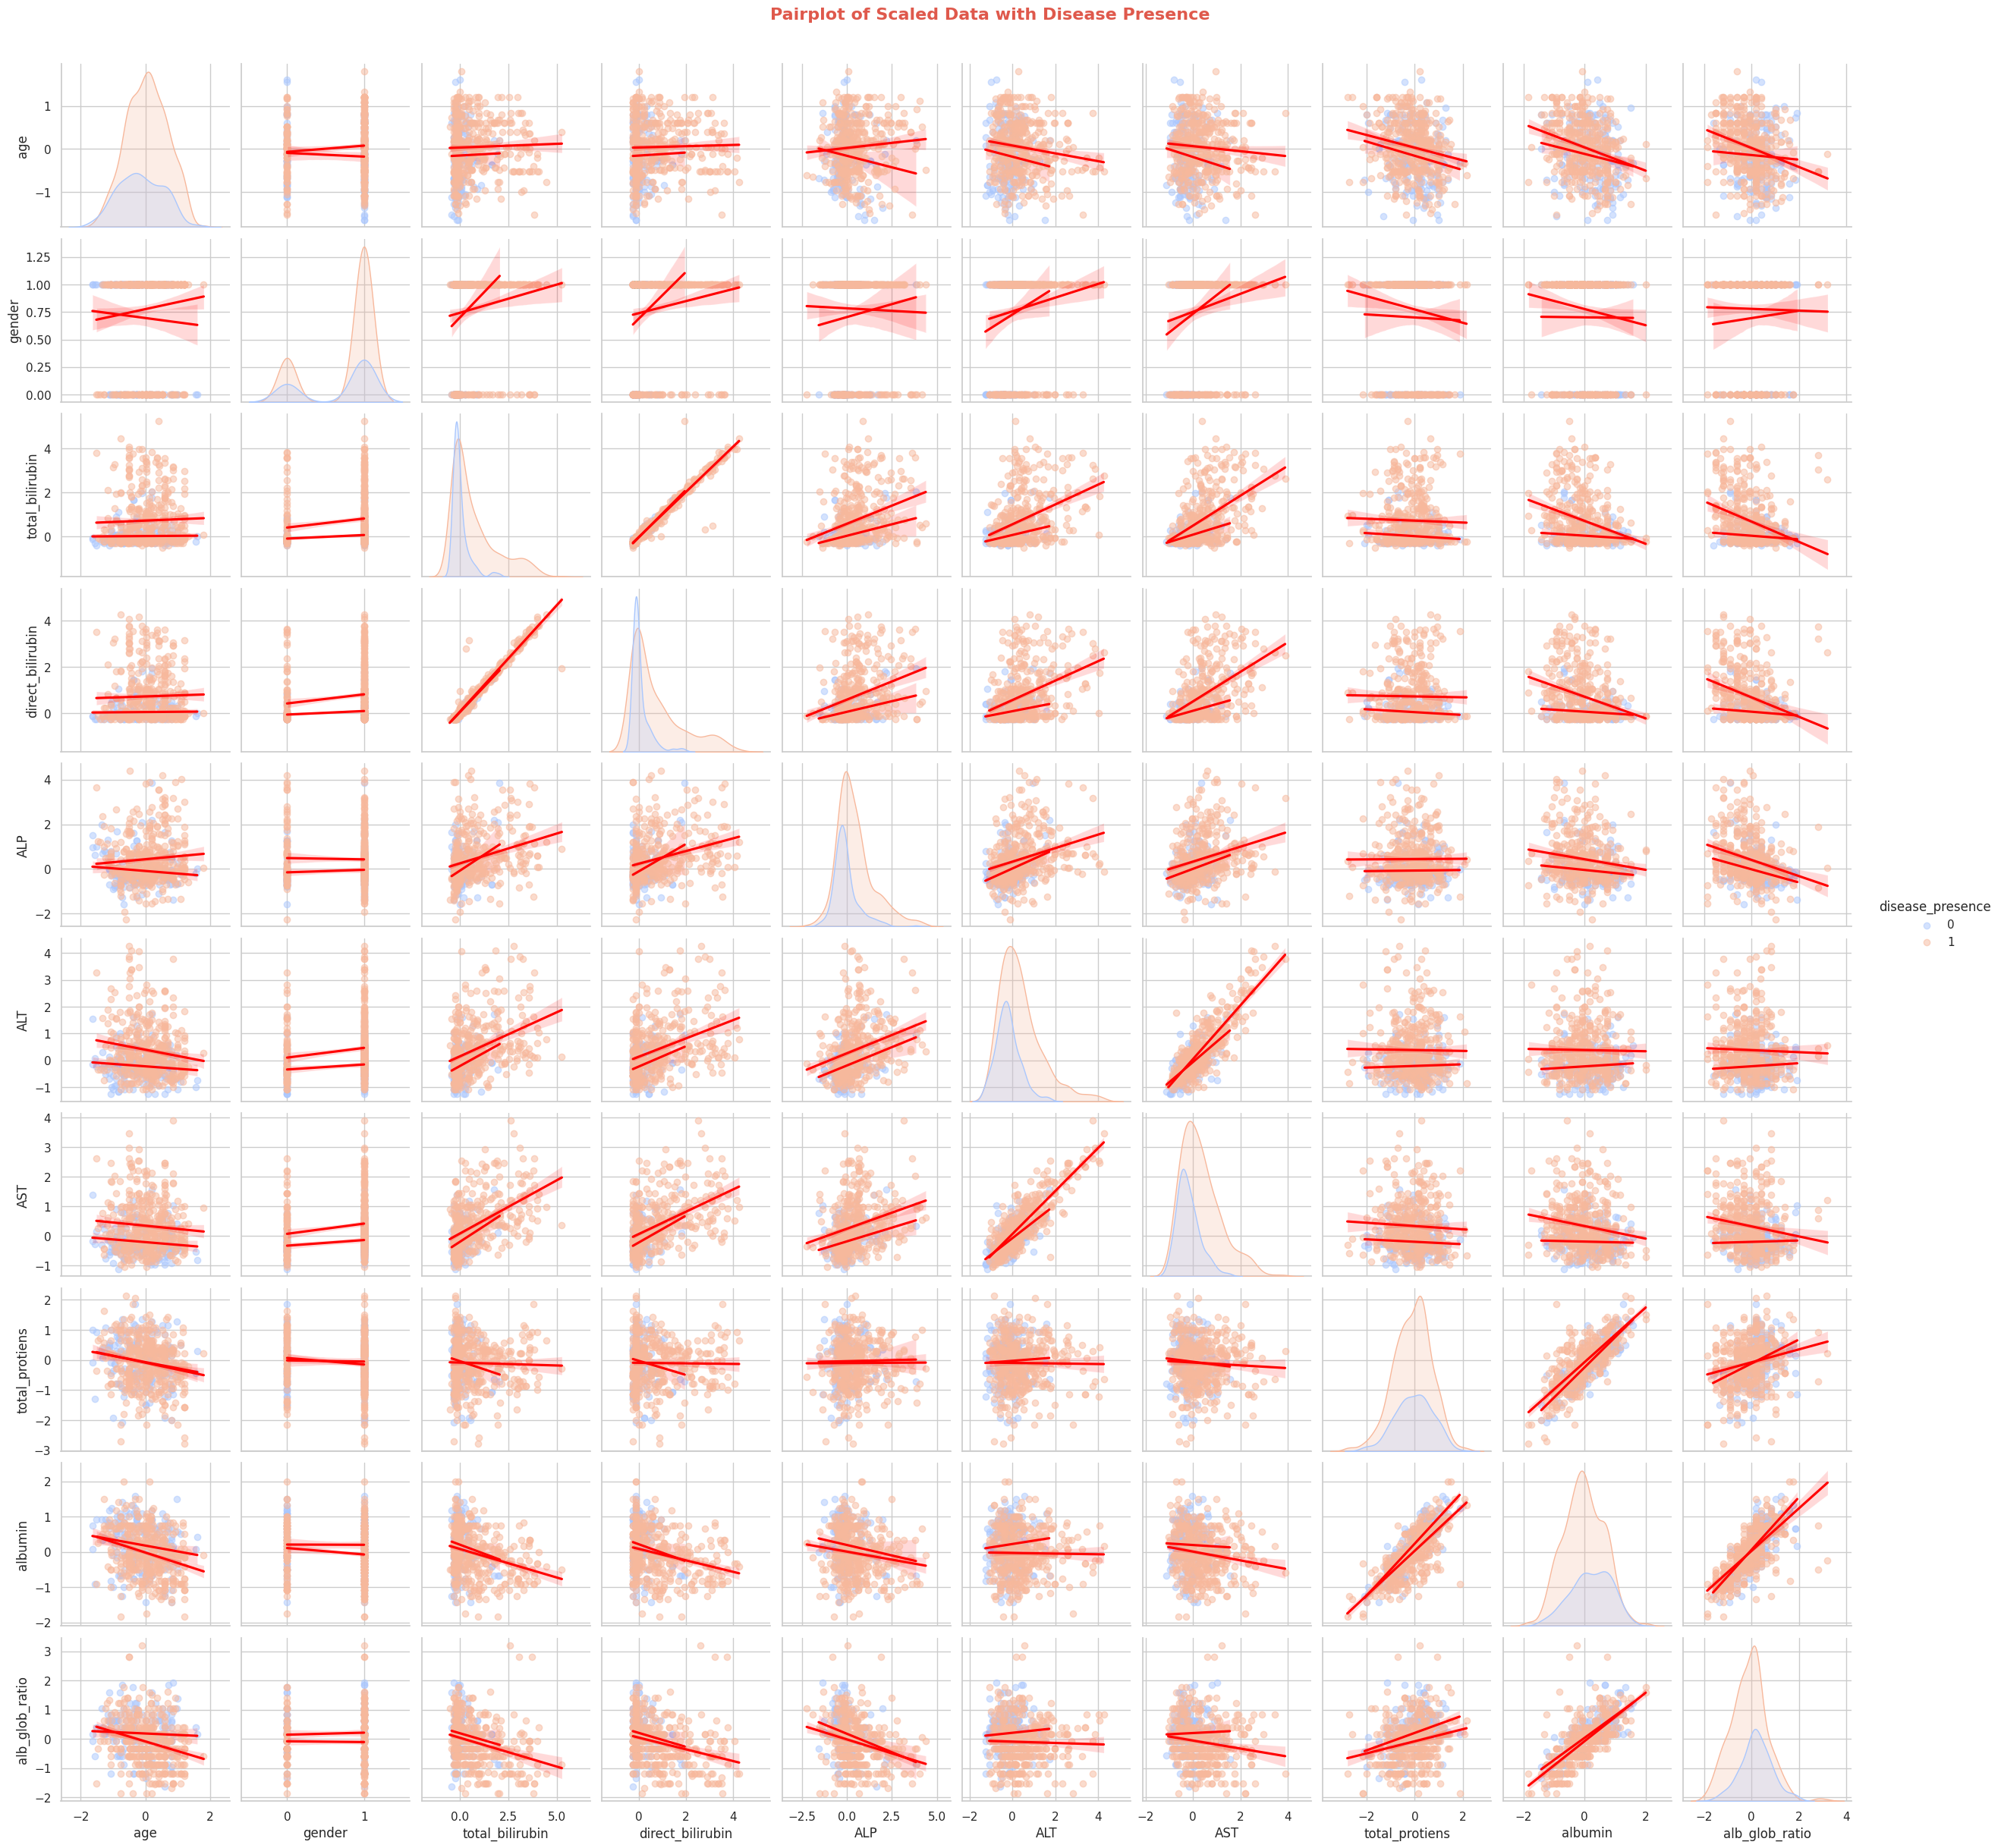

In [134]:
sns.set(style="whitegrid")

sns.pairplot(df_scaled, kind='reg', hue='disease_presence', palette='coolwarm', diag_kind='kde',
             height=2.5, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})

plt.suptitle("Pairplot of Scaled Data with Disease Presence", fontsize=16, color=color1, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the title's position
plt.show()

In [135]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, mask=mask, cmap=cmap, annot=True, fmt=".2f",
                      linewidths=.5, square=True, cbar_kws={'shrink': 0.7, 'label': 'Correlation Coefficient'})

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18, 'fontweight': 'bold'}, pad=20)
plt.xticks(fontsize=12, rotation=90, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

1. **Total Bilirubin and Direct Bilirubin**:  
   - **Very strong positive correlation** \(r = 0.98\): As expected, total and direct bilirubin are highly correlated since direct bilirubin is a component of total bilirubin.

2. **ALT and AST**:  
   - **Strong positive correlation** \(r = 0.84\): These liver enzymes are strongly correlated, indicating they often increase together in cases of liver disease.

3. **Total Proteins and Albumin**:  
   - **Strong positive correlation** \(r = 0.78\): Since albumin is a major component of total protein, this strong correlation is natural.

4. **Albumin and Albumin/Globulin Ratio**:  
   - **Strong positive correlation** \(r = 0.73\): Albumin is closely related to the A/G ratio, as it plays a key role in its calculation.

## **Class Balancing (disease_presence column) → SMOTE & Prediction**  

In [136]:
df.disease_presence.value_counts()

disease_presence
1    416
0    167
Name: count, dtype: int64

In [137]:
X_scaled = df_scaled.drop(columns=['disease_presence'])
y_scaled = df_scaled['disease_presence']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled,
                                                                                test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_scaled, y_train_scaled = smote.fit_resample(X_train_scaled, y_train_scaled)

print("Class distribution after SMOTE:")
print(y_train_scaled.value_counts())

Class distribution after SMOTE:
disease_presence
1    329
0    329
Name: count, dtype: int64


#### **ElasticNet – combines L1 (feature selection) and L2 (multicollinearity handling)**  

### **1) Logistic regression**

#### Standared Scaler was applied

In [138]:
# Logistic Regression with ElasticNet
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model.fit(X_train_scaled, y_train_scaled)
pred = model.predict(X_test_scaled)

score = model.score(X_test_scaled, y_test_scaled)
print(f'Accuracy Score: {score:.2f}')

Accuracy Score: 0.71


In [139]:
print('*** Train performance ***')
print()
print(classification_report(y_train_scaled, model.predict(X_train_scaled)))

print('\n*** Test performance ***')
print()
print(classification_report(y_test_scaled, pred))

print('Accuracy on Test Set: \n', accuracy_score(y_test_scaled, pred))
print('ROC AUC score on Test Set: \n', roc_auc_score(y_test_scaled, pred))

coefficients = model.coef_
intercept = model.intercept_

print('\nLogistic Regression Coefficients (ElasticNet): \n', coefficients)
print('Logistic Regression Intercept (ElasticNet): \n', intercept)

*** Train performance ***

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       329
           1       0.77      0.62      0.68       329

    accuracy                           0.72       658
   macro avg       0.72      0.72      0.71       658
weighted avg       0.72      0.72      0.71       658


*** Test performance ***

              precision    recall  f1-score   support

           0       0.47      0.90      0.61        30
           1       0.95      0.64      0.77        87

    accuracy                           0.71       117
   macro avg       0.71      0.77      0.69       117
weighted avg       0.83      0.71      0.73       117

Accuracy on Test Set: 
 0.7094017094017094
ROC AUC score on Test Set: 
 0.7718390804597702

Logistic Regression Coefficients (ElasticNet): 
 [[ 0.39339586  0.22649463 -0.12619937  0.93486598  0.36939049  0.40903369
   0.37314415  1.04984886 -1.66768061  0.66267206]]
Logistic Regression Inter

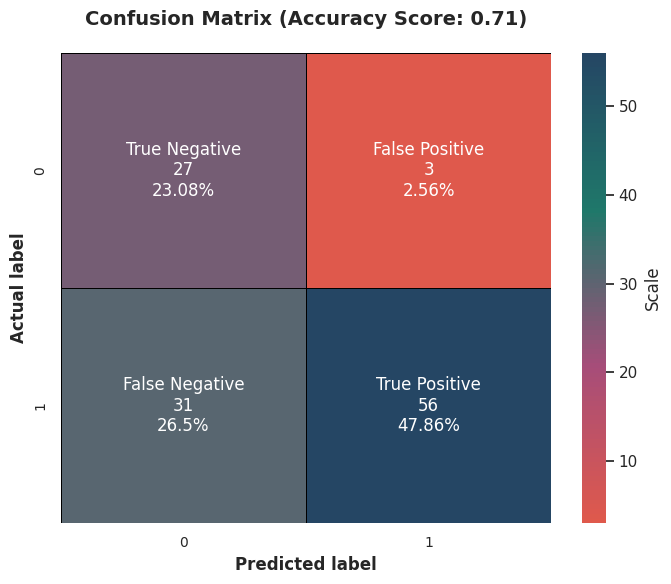

In [140]:
cm = confusion_matrix(y_test_scaled, pred)
score = model.score(X_test_scaled, y_test_scaled)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = [f"{i}" for i in cm.flatten()]
group_perc = [f"{round(i/np.sum(cm)*100, 2)}%" for i in cm.flatten()]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_perc)]
labels = np.asarray(labels).reshape(2, 2)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=labels, fmt="", cmap=cmap, cbar_kws={'label': 'Scale'}, linewidths=0.5, linecolor='black')

plt.ylabel('Actual label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted label', fontsize=12, fontweight='bold')
plt.title(f'Confusion Matrix (Accuracy Score: {round(score, 2)})', fontsize=14, fontweight='bold', pad=20)

plt.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### **2) Decision Tree**

In [141]:
X = df.drop(columns=['disease_presence'])
y = df['disease_presence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train.value_counts())

Class distribution after SMOTE:
disease_presence
1    329
0    329
Name: count, dtype: int64


In [142]:
# Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model = model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print(f'Accuracy Score: {accuracy:.2f}')


Accuracy Score: 0.68


In [143]:
feature_importances = model.feature_importances_

for feature, importance in zip(X_train_scaled.columns, feature_importances):
    print(f'Feature: {feature}, Importance: {importance:.4f}')


Feature: age, Importance: 0.1448
Feature: gender, Importance: 0.0137
Feature: total_bilirubin, Importance: 0.0483
Feature: direct_bilirubin, Importance: 0.2604
Feature: ALP, Importance: 0.1115
Feature: ALT, Importance: 0.1350
Feature: AST, Importance: 0.0888
Feature: total_protiens, Importance: 0.0521
Feature: albumin, Importance: 0.0828
Feature: alb_glob_ratio, Importance: 0.0624


In [144]:
print('*** Train performance ***')
print()
print(classification_report(y_train, model.predict(X_train)))

print('\n*** Test performance ***')
print()
print(classification_report(y_test, pred))

print('Accuracy: \n', accuracy_score(y_test,pred))
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
print('Roc_auc score: \n', roc_auc_score(y_test, pred))

*** Train performance ***

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       329

    accuracy                           1.00       658
   macro avg       1.00      1.00      1.00       658
weighted avg       1.00      1.00      1.00       658


*** Test performance ***

              precision    recall  f1-score   support

           0       0.39      0.40      0.39        30
           1       0.79      0.78      0.79        87

    accuracy                           0.68       117
   macro avg       0.59      0.59      0.59       117
weighted avg       0.69      0.68      0.69       117

Accuracy: 
 0.6837606837606838
Roc_auc score: 
 0.5908045977011495


**The model is clearly overfitted.**

In [145]:
cm = confusion_matrix(y_test, pred)
score = model.score(X_test, y_test)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = [f"{i}" for i in cm.flatten()]
group_perc = [f"{round(i/np.sum(cm)*100, 2)}%" for i in cm.flatten()]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_perc)]
labels = np.asarray(labels).reshape(2, 2)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=labels, fmt="", cmap=cmap, cbar_kws={'label': 'Scale'}, linewidths=0.5, linecolor='black')

plt.ylabel('Actual label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted label', fontsize=12, fontweight='bold')
plt.title(f'Confusion Matrix (Accuracy Score: {round(score, 2)})', fontsize=14, fontweight='bold', pad=20)

plt.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()

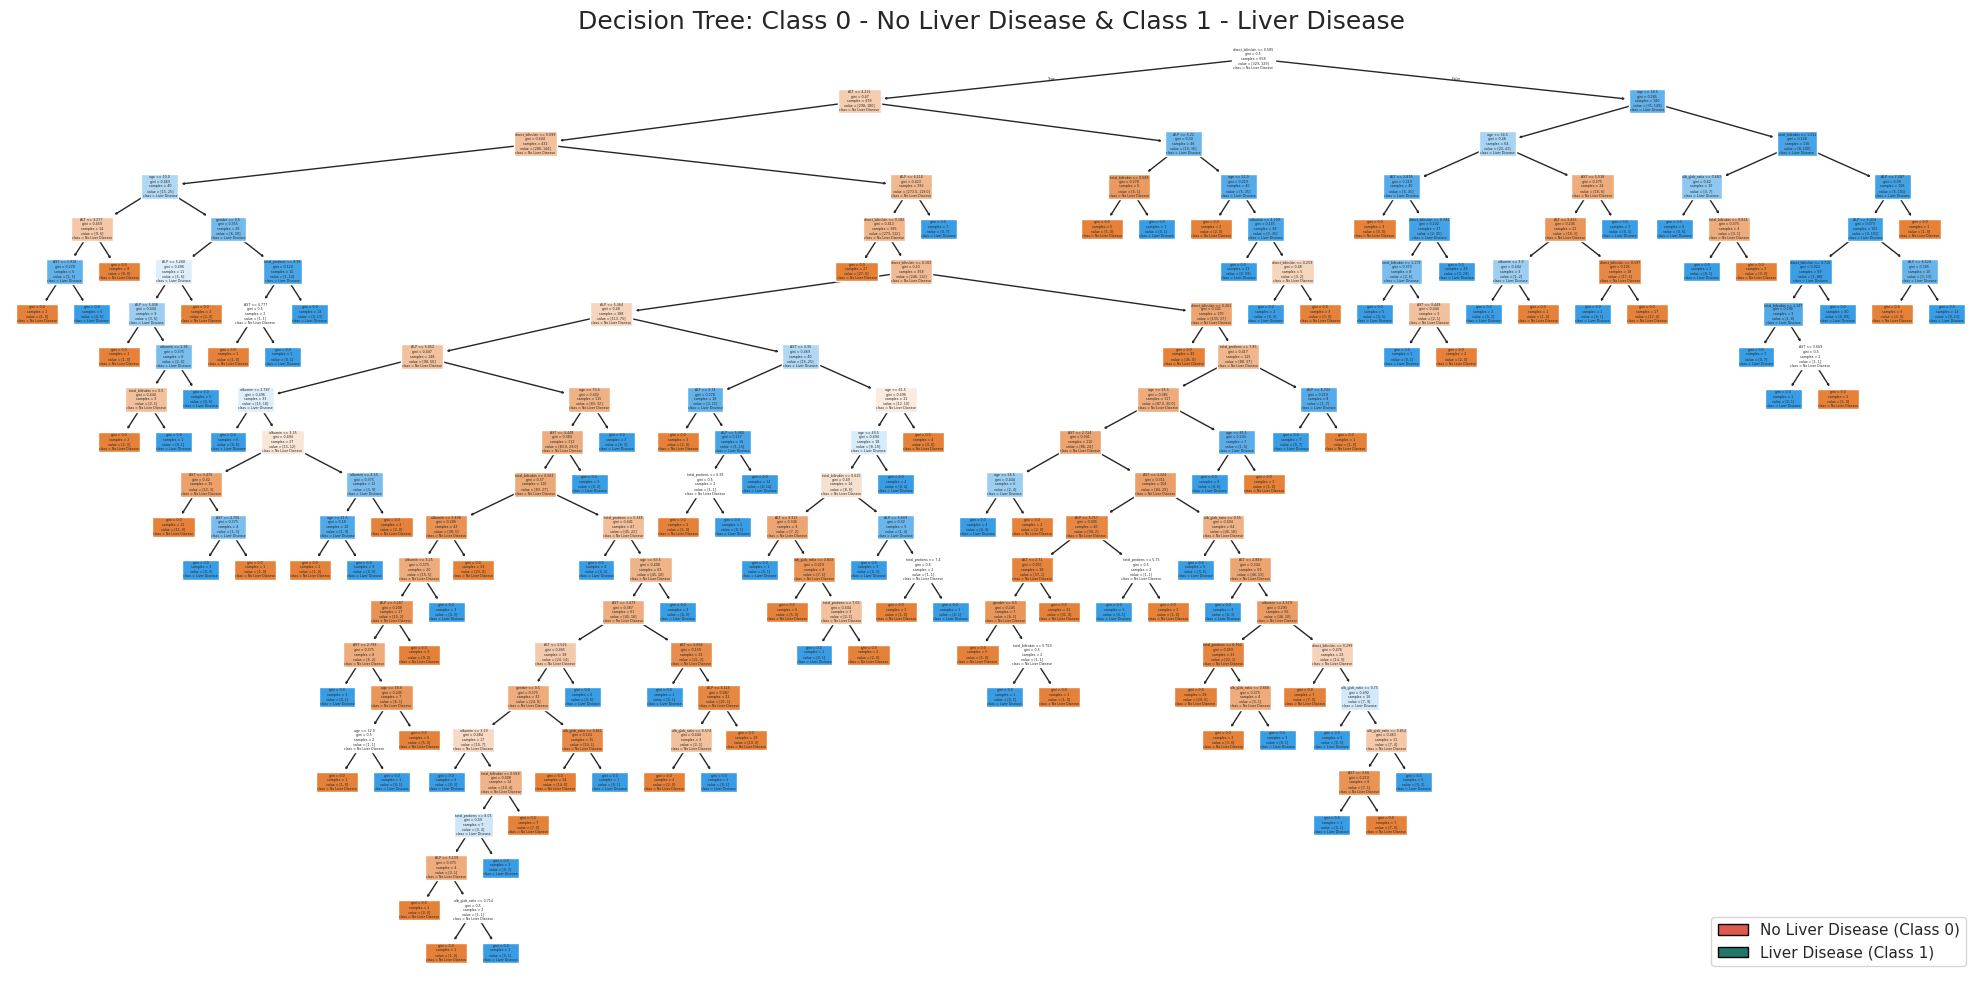

In [146]:
feature_names = X_train.columns
class_names = ['No Liver Disease', 'Liver Disease']


fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          ax=ax)

legend_elements = [
    Patch(facecolor=color1, edgecolor='black', label='No Liver Disease (Class 0)'),
    Patch(facecolor=color2, edgecolor='black', label='Liver Disease (Class 1)')
]

ax.legend(handles=legend_elements, loc='lower right')
plt.title("Decision Tree: Class 0 - No Liver Disease & Class 1 - Liver Disease", fontsize=18)

plt.rcParams['font.family'] = 'sans-serif'

plt.tight_layout()
plt.show()

#### **Fine Tuning**

In [147]:
param_grid = {
    'max_depth': [5, 7, 10],                  # Limit depth to reduce complexity
    'min_samples_split': [10, 20, 30],        # Require more samples to split
    'min_samples_leaf': [5, 10, 15],          # Require more samples in leaf nodes
    'criterion': ['gini', 'entropy'],         # Keep the same split criterion options
    'max_features': ['sqrt', 'log2'],         # Focus on subset of features
    'ccp_alpha': [0.001, 0.01, 0.1]           # Add cost complexity pruning
}

model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f'Accuracy Score after Fine-Tuning: {accuracy:.2f}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 30}
Accuracy Score after Fine-Tuning: 0.69


In [148]:
model = DecisionTreeClassifier(criterion='gini',
                               ccp_alpha = 0.001,
                               max_depth=7,
                               max_features='sqrt',
                               min_samples_leaf=10,
                               min_samples_split=30,
                               random_state=42,
                               class_weight='balanced')

model.fit(X_train, y_train)

pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f'Accuracy Score after Fine-Tuning: {accuracy:.2f}')

Accuracy Score after Fine-Tuning: 0.69


In [149]:
print('*** Train performance ***')
print()
print(classification_report(y_train, model.predict(X_train)))

print('\n*** Test performance ***')
print()
print(classification_report(y_test, pred))

print('Accuracy: \n', accuracy_score(y_test,pred))
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
print('Roc_auc score: \n', roc_auc_score(y_test, pred))

*** Train performance ***

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       329
           1       0.82      0.73      0.77       329

    accuracy                           0.78       658
   macro avg       0.78      0.78      0.78       658
weighted avg       0.78      0.78      0.78       658


*** Test performance ***

              precision    recall  f1-score   support

           0       0.44      0.73      0.55        30
           1       0.88      0.68      0.77        87

    accuracy                           0.69       117
   macro avg       0.66      0.71      0.66       117
weighted avg       0.77      0.69      0.71       117

Accuracy: 
 0.6923076923076923
Roc_auc score: 
 0.7057471264367816


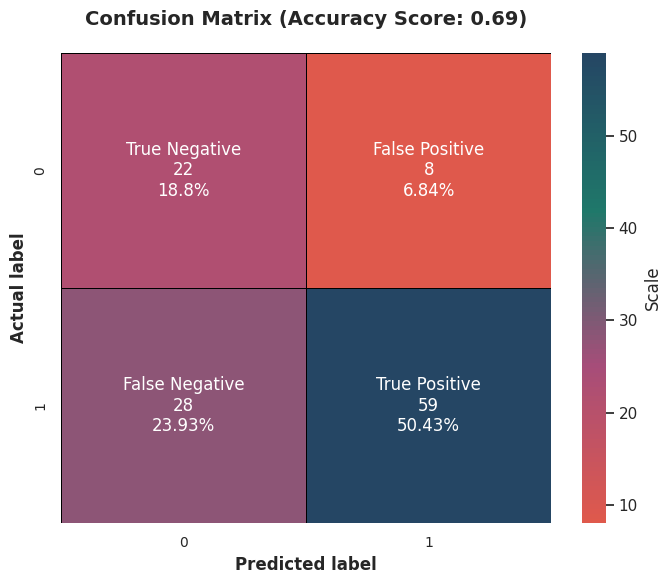

In [150]:
cm = confusion_matrix(y_test, pred)
score = model.score(X_test, y_test)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = [f"{i}" for i in cm.flatten()]
group_perc = [f"{round(i/np.sum(cm)*100, 2)}%" for i in cm.flatten()]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_perc)]
labels = np.asarray(labels).reshape(2, 2)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=labels, fmt="", cmap=cmap, cbar_kws={'label': 'Scale'}, linewidths=0.5, linecolor='black')

plt.ylabel('Actual label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted label', fontsize=12, fontweight='bold')
plt.title(f'Confusion Matrix (Accuracy Score: {round(score, 2)})', fontsize=14, fontweight='bold', pad=20)

plt.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

In [151]:
feature_names = X_train.columns
class_names = ['No Liver Disease', 'Liver Disease']


fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          ax=ax)

legend_elements = [
    Patch(facecolor=color1, edgecolor='black', label='No Liver Disease (Class 0)'),
    Patch(facecolor=color2, edgecolor='black', label='Liver Disease (Class 1)')
]

ax.legend(handles=legend_elements, loc='lower right')
plt.title("Decision Tree: Class 0 - No Liver Disease & Class 1 - Liver Disease", fontsize=18)

plt.rcParams['font.family'] = 'sans-serif'

plt.tight_layout()
plt.show()

### **3) Random forest**

#### **Benchmark**

In [152]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

pred_rf = rf_model.predict(X_test)

print('*** Test performance ***')
print(classification_report(y_test, pred_rf))
print('Accuracy: \n', accuracy_score(y_test, pred_rf))

*** Test performance ***
              precision    recall  f1-score   support

           0       0.47      0.57      0.52        30
           1       0.84      0.78      0.81        87

    accuracy                           0.73       117
   macro avg       0.66      0.67      0.66       117
weighted avg       0.75      0.73      0.73       117

Accuracy: 
 0.7264957264957265


In [153]:
param_dist = {
    'n_estimators': [100, 200, 500, 1000],      # More trees
    'max_depth': [5, 10, 15],                   # Control tree depth
    'min_samples_split': [10, 20, 30, 50],      # More conservative splits
    'min_samples_leaf': [5, 10, 20],            # More samples in leaf nodes
    'max_features': ['sqrt', 'log2'],           # Consider subset of features
}

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10}


In [154]:
pred_rf_best = best_rf_model.predict(X_test)
print('*** Tuned RF Test performance ***')

print('*** Train performance ***')
print()
print(classification_report(y_train, best_rf_model.predict(X_train)))

print('\n*** Test performance ***')
print()
print(classification_report(y_test, pred_rf_best))

print('Accuracy: \n', accuracy_score(y_test,pred))
print('Roc_auc score: \n', roc_auc_score(y_test, pred))

*** Tuned RF Test performance ***
*** Train performance ***

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       329
           1       0.97      0.86      0.91       329

    accuracy                           0.92       658
   macro avg       0.92      0.92      0.92       658
weighted avg       0.92      0.92      0.92       658


*** Test performance ***

              precision    recall  f1-score   support

           0       0.48      0.70      0.57        30
           1       0.88      0.74      0.80        87

    accuracy                           0.73       117
   macro avg       0.68      0.72      0.68       117
weighted avg       0.77      0.73      0.74       117

Accuracy: 
 0.6923076923076923
Roc_auc score: 
 0.7057471264367816


In [155]:
cm = confusion_matrix(y_test, pred)
score = best_rf_model.score(X_test, y_test)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = [f"{i}" for i in cm.flatten()]
group_perc = [f"{round(i/np.sum(cm)*100, 2)}%" for i in cm.flatten()]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_perc)]
labels = np.asarray(labels).reshape(2, 2)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=labels, fmt="", cmap=cmap, cbar_kws={'label': 'Scale'}, linewidths=0.5, linecolor='black')

plt.ylabel('Actual label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted label', fontsize=12, fontweight='bold')
plt.title(f'Confusion Matrix (Accuracy Score: {round(score, 2)})', fontsize=14, fontweight='bold', pad=20)

plt.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

#### **Timing Measurement**

In [156]:
start_time = time.time()
pred_rf_best = best_rf_model.predict(X_test)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"\nExecution time: {elapsed_time:.4f} seconds")


Execution time: 0.0188 seconds


### **4) X-Boost Classifier**

In [157]:
import xgboost as xgb
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3],
    'reg_alpha': [1.0, 3.0, 5.0],
    'reg_lambda': [2.0, 6.0, 8.0, 10.0]
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   n_iter=50, cv=5, random_state=42, n_jobs=-1, verbose=2)

random_search.fit(X_train, y_train,)

best_xgb_model = random_search.best_estimator_
pred_xgb_best = best_xgb_model.predict(X_test)

print("*** Tuned XGBoost Test performance ***")
print(classification_report(y_test, pred_xgb_best))
print('Accuracy: \n', accuracy_score(y_test, pred_xgb_best))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
*** Tuned XGBoost Test performance ***
              precision    recall  f1-score   support

           0       0.50      0.57      0.53        30
           1       0.84      0.80      0.82        87

    accuracy                           0.74       117
   macro avg       0.67      0.69      0.68       117
weighted avg       0.76      0.74      0.75       117

Accuracy: 
 0.7435897435897436


In [158]:
print('*** Train performance ***')
print()
print(classification_report(y_train, best_xgb_model.predict(X_train)))

print('\n*** Test performance ***')
print()
print(classification_report(y_test, pred))

print('Accuracy: \n', accuracy_score(y_test,pred))
print('Roc_auc score: \n', roc_auc_score(y_test, pred))

*** Train performance ***

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       329
           1       0.96      0.93      0.94       329

    accuracy                           0.95       658
   macro avg       0.95      0.95      0.95       658
weighted avg       0.95      0.95      0.95       658


*** Test performance ***

              precision    recall  f1-score   support

           0       0.44      0.73      0.55        30
           1       0.88      0.68      0.77        87

    accuracy                           0.69       117
   macro avg       0.66      0.71      0.66       117
weighted avg       0.77      0.69      0.71       117

Accuracy: 
 0.6923076923076923
Roc_auc score: 
 0.7057471264367816


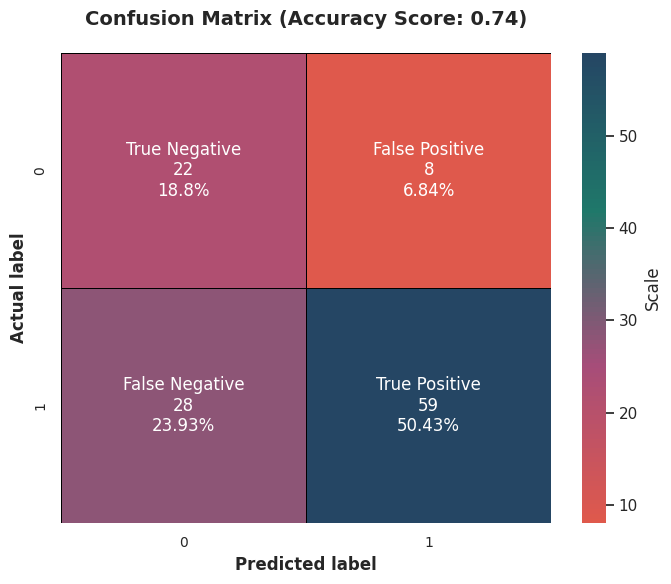

In [159]:
cm = confusion_matrix(y_test, pred)
score = best_xgb_model.score(X_test, y_test)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = [f"{i}" for i in cm.flatten()]
group_perc = [f"{round(i/np.sum(cm)*100, 2)}%" for i in cm.flatten()]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_perc)]
labels = np.asarray(labels).reshape(2, 2)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=labels, fmt="", cmap=cmap, cbar_kws={'label': 'Scale'}, linewidths=0.5, linecolor='black')

plt.ylabel('Actual label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted label', fontsize=12, fontweight='bold')
plt.title(f'Confusion Matrix (Accuracy Score: {round(score, 2)})', fontsize=14, fontweight='bold', pad=20)

plt.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

#### **Timing Measurement**

In [160]:
start_time = time.time()
pred_xgb_best = best_xgb_model.predict(X_test)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"\nExecution time: {elapsed_time:.4f} seconds")


Execution time: 0.0058 seconds


### **5) Extra Trees**

In [161]:
param_grid_et = {
    'n_estimators': [100, 200, 500],        # Number of trees
    'max_depth': [None, 10, 20, 30],        # Max depth of each tree
    'min_samples_split': [2, 5, 10],        # Min samples to split
    'min_samples_leaf': [1, 2, 4],          # Min samples for leaf node
    'max_leaf_nodes': [None, 10, 20, 50],   # Max number of leaf nodes
    'criterion': ['gini', 'entropy']        # Criterion for split quality
}

et_model = ExtraTreesClassifier(random_state=42)

gs_et = GridSearchCV(estimator=et_model, param_grid=param_grid_et,
                     n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc', verbose=2)

gs_et.fit(X_train, y_train)

best_et_model = gs_et.best_estimator_

print(f'Best Extra Trees Hyperparameters: {gs_et.best_params_}')

y_test_pred = best_et_model.predict(X_test)
print(f'*** Extra Trees Classifier Test performance ***')
print(classification_report(y_test, y_test_pred))
print('Accuracy: \n', accuracy_score(y_test, y_test_pred))
print('Roc_auc score: \n', roc_auc_score(y_test, y_test_pred))


Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Best Extra Trees Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
*** Extra Trees Classifier Test performance ***
              precision    recall  f1-score   support

           0       0.44      0.63      0.52        30
           1       0.85      0.72      0.78        87

    accuracy                           0.70       117
   macro avg       0.65      0.68      0.65       117
weighted avg       0.75      0.70      0.72       117

Accuracy: 
 0.7008547008547008
Roc_auc score: 
 0.678735632183908


In [162]:
print('*** Train performance ***')
print()
print(classification_report(y_train, best_et_model.predict(X_train)))

print('\n*** Test performance ***')
print()
print(classification_report(y_test, pred))

print('Accuracy: \n', accuracy_score(y_test,pred))
print('Roc_auc score: \n', roc_auc_score(y_test, pred))

*** Train performance ***

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       329

    accuracy                           1.00       658
   macro avg       1.00      1.00      1.00       658
weighted avg       1.00      1.00      1.00       658


*** Test performance ***

              precision    recall  f1-score   support

           0       0.44      0.73      0.55        30
           1       0.88      0.68      0.77        87

    accuracy                           0.69       117
   macro avg       0.66      0.71      0.66       117
weighted avg       0.77      0.69      0.71       117

Accuracy: 
 0.6923076923076923
Roc_auc score: 
 0.7057471264367816


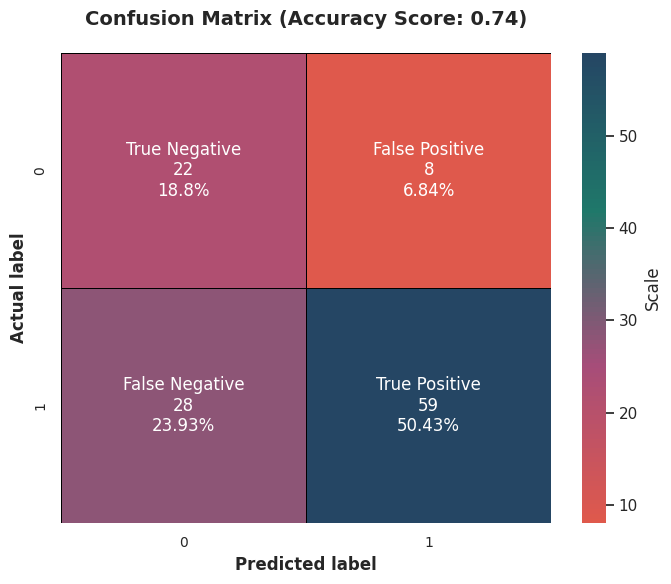

In [163]:
cm = confusion_matrix(y_test, pred)
score = best_xgb_model.score(X_test, y_test)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = [f"{i}" for i in cm.flatten()]
group_perc = [f"{round(i/np.sum(cm)*100, 2)}%" for i in cm.flatten()]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_perc)]
labels = np.asarray(labels).reshape(2, 2)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=labels, fmt="", cmap=cmap, cbar_kws={'label': 'Scale'}, linewidths=0.5, linecolor='black')

plt.ylabel('Actual label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted label', fontsize=12, fontweight='bold')
plt.title(f'Confusion Matrix (Accuracy Score: {round(score, 2)})', fontsize=14, fontweight='bold', pad=20)

plt.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

#### **Timing Measurement**

In [164]:
start_time = time.time()
pred_et_best = best_et_model.predict(X_test)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"\nExecution time: {elapsed_time:.4f} seconds")


Execution time: 0.0309 seconds


### **6) Voting**

In [165]:
votes = [
    ('random_forest', grid_search.best_estimator_),  # Лучший  Random Forest
    ('x_boost_classifier', random_search.best_estimator_)  # Лучший  XGBoost
]

votesClass = VotingClassifier(estimators=votes, voting='soft', n_jobs=-1)

votesClass_cv = cross_validate(votesClass, X_train, y_train, cv=3)

votesClass.fit(X_train, y_train)

pred_votesClass = votesClass.predict(X_test)

print("*** Tuned Voting Classifier Test performance ***")
print(classification_report(y_test, pred_votesClass))
print('Accuracy: \n', accuracy_score(y_test, pred_votesClass))

*** Tuned Voting Classifier Test performance ***
              precision    recall  f1-score   support

           0       0.50      0.63      0.56        30
           1       0.86      0.78      0.82        87

    accuracy                           0.74       117
   macro avg       0.68      0.71      0.69       117
weighted avg       0.77      0.74      0.75       117

Accuracy: 
 0.7435897435897436


In [166]:
votesClass_cv

{'fit_time': array([0.33004189, 0.31045222, 0.30066657]),
 'score_time': array([0.01801395, 0.02102542, 0.01988196]),
 'test_score': array([0.67727273, 0.74885845, 0.7716895 ])}

In [167]:
model = votesClass
pred = model.predict(X_test)

print('*** Train performance ***')
print()
print(classification_report(y_train, model.predict(X_train)))

print('\n*** Test performance ***')
print()
print(classification_report(y_test, pred))

print('Accuracy: \n', accuracy_score(y_test,pred))
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
print('Roc_auc score: \n', roc_auc_score(y_test, pred))


*** Train performance ***

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       329
           1       0.97      0.92      0.94       329

    accuracy                           0.94       658
   macro avg       0.94      0.94      0.94       658
weighted avg       0.94      0.94      0.94       658


*** Test performance ***

              precision    recall  f1-score   support

           0       0.50      0.63      0.56        30
           1       0.86      0.78      0.82        87

    accuracy                           0.74       117
   macro avg       0.68      0.71      0.69       117
weighted avg       0.77      0.74      0.75       117

Accuracy: 
 0.7435897435897436
Roc_auc score: 
 0.707471264367816


#### **Timing Measurement**

In [168]:
start_time = time.time()
pred_vc_best = votesClass.predict(X_test)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"\nExecution time: {elapsed_time:.4f} seconds")


Execution time: 0.0257 seconds


# **Conclusion**

1. **Voting Classifier Achieved the Best Overall Performance**  
   By aggregating the strengths of top individual classifiers, it produced the highest accuracy and AUC on the test set.

2. **XGBoost Was the Best Standalone Model**  
   XGBoost consistently delivered high ROC AUC scores and strong accuracy, making it the top single-model choice for liver disease prediction.

3. **Random Forest Provided a Reliable Baseline**  
   With less tuning effort, RF yielded solid results and interpretability through feature importance.

4. **Extra Trees Was Fast but Slightly Less Accurate**  
   Although quick to train and useful for initial screening, its randomness occasionally led to less stable predictions.

5. **Model Execution Time Was Minimal**  
   All models showed low latency (as measured using `time.time()`).